In [1]:
options(warn=-1)
library(dplyr)
library(ggplot2)
library(mongolite)
library(lubridate)
library(cowplot)
library(ggcorrplot)
library(skimr)
library(Hmisc)
library(plotrix)
library(mongolite)
library(data.table)
library(caret)
library(rpart)
library(RColorBrewer)
library(partykit)
library(rattle)
library(ROSE)
library(randomForest)
library(kernlab)
library(e1071) 


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: 'cowplot'

The following object is masked from 'package:lubridate':

    stamp

Registered S3 method overwritten by 'skimr':
  method      from  
  print.spark pillar

Attaching package: 'skimr'

The following object is masked from 'package:stats':

    filter

Loadin

In [2]:
data <- read.csv("hr_analytics.csv")

In [3]:
# collection = mongo(collection = "hr_analytic", db='fit5141')
# collection$insert(data)

In [4]:
unique(data$CatYearManager)

NULL

In [5]:
data %>% glimpse()

Observations: 1,470
Variables: 35
$ ï..Age                   <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35...
$ Attrition                <fct> Yes, No, Yes, No, No, No, No, No, No, No, ...
$ BusinessTravel           <fct> Travel_Rarely, Travel_Frequently, Travel_R...
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 13...
$ Department               <fct> Sales, Research & Development, Research & ...
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 2...
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, ...
$ EducationField           <fct> Life Sciences, Life Sciences, Other, Life ...
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, ...
$ Gender                   <fct> Female, Male, Male, Female, Male, Male, Fe...
$ HourlyRate      

In [6]:
# firstly, change the age to from i..Age to age 
names(data)[1] = "Age"

In [7]:
Hmisc::describe(data)

data 

 35  Variables      1470  Observations
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1470        0       43    0.999    36.92    10.33       24       26 
     .25      .50      .75      .90      .95 
      30       36       43       50       54 

lowest : 18 19 20 21 22, highest: 56 57 58 59 60
--------------------------------------------------------------------------------
Attrition 
       n  missing distinct 
    1470        0        2 
                      
Value         No   Yes
Frequency   1233   237
Proportion 0.839 0.161
--------------------------------------------------------------------------------
BusinessTravel 
       n  missing distinct 
    1470        0        3 
                                                                
Value             Non-Travel Travel_Frequently     Travel_Rarely
Frequency                150               277           

There is no null value from dataset, quite luckly then. Now, let's see the column names of the dataset


In [8]:
data %>% Filter(f = is.factor) %>% glimpse()

Observations: 1,470
Variables: 9
$ Attrition      <fct> Yes, No, Yes, No, No, No, No, No, No, No, No, No, No...
$ BusinessTravel <fct> Travel_Rarely, Travel_Frequently, Travel_Rarely, Tra...
$ Department     <fct> Sales, Research & Development, Research & Developmen...
$ EducationField <fct> Life Sciences, Life Sciences, Other, Life Sciences, ...
$ Gender         <fct> Female, Male, Male, Female, Male, Male, Female, Male...
$ JobRole        <fct> Sales Executive, Research Scientist, Laboratory Tech...
$ MaritalStatus  <fct> Single, Married, Single, Married, Married, Single, M...
$ Over18         <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y...
$ OverTime       <fct> Yes, No, Yes, Yes, No, No, Yes, No, No, No, No, Yes,...


In [9]:
# and now see all attribute as the numeric
data %>% Filter(f = is.numeric) %>% glimpse()

Observations: 1,470
Variables: 26
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35...
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 13...
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 2...
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, ...
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, ...
$ HourlyRate               <int> 94, 61, 92, 56, 40, 79, 81, 67, 44, 94, 84...
$ JobInvolvement           <int> 3, 2, 2, 3, 3, 3, 4, 3, 2, 3, 4, 2, 3, 3, ...
$ JobLevel                 <int> 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, ...
$ JobSatisfaction          <int> 4, 2, 3, 3, 2, 4, 1, 3, 3, 3, 2, 3, 3, 4, ...
$ MonthlyIncome            <int> 5993, 5130, 2090, 2909, 3468, 3068, 2670, ...
$ MonthlyRate     

Summary of the data, we have 9 attributes as the factors and 36 attributes as the numeric. Also, there is no missing data, so no need to do data wrangling. 

There is two ways to import data into database
- First, one collection for factor attribute

From now on, we going to do data visualisation in R, then convert to tableau.

## Exploration Data Analysis

First, I want to see whether the working overtime affect to the attrition of the employee


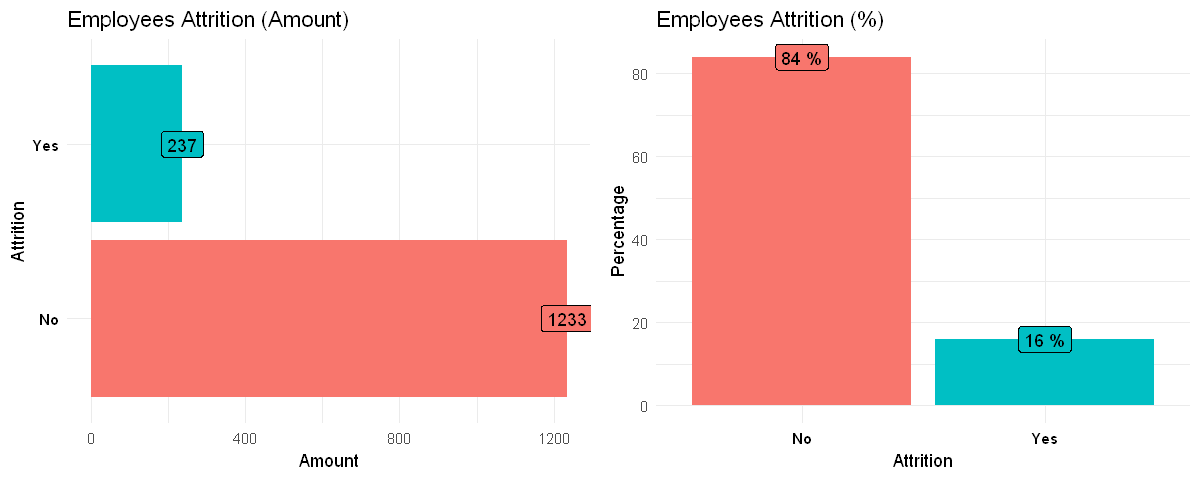

In [10]:
options(repr.plot.width=10, repr.plot.height=4) 
p1 <- data %>% group_by(Attrition) %>% summarise(Count=n()) %>% ggplot(aes(x=Attrition,y=Count,fill=Attrition)) + 
    geom_bar(stat = 'identity') + geom_label(aes(label=Count)) + theme_minimal() + coord_flip() +
    theme(legend.position = "none", axis.text.y = element_text(colour = 'black',face = 'bold')) + 
    labs(title="Employees Attrition (Amount)",y="Amount")
p2 <- data %>% group_by(Attrition) %>% summarise(Count=n()) %>% mutate(pct=round(prop.table(Count),2)*100) %>% 
    ggplot(aes(x=Attrition,y=pct,fill=Attrition)) + geom_bar(stat='identity') + 
    geom_label(aes(label=paste(pct,'%'))) + theme_minimal()  + labs(title="Employees Attrition (%)",y="Percentage") + 
    theme(legend.position = "none", axis.text.x = element_text(colour = 'black',face = 'bold'))

plot_grid(p1,p2,nrow=1)

In [11]:
# gender distribution 
data %>% select(Gender, Age) %>% group_by(Gender) %>% summarise(Count=n())
data %>% select(Gender, Age) %>% group_by(Gender) %>% summarise(avg=mean(Age))

Gender,Count
Female,588
Male,882


Gender,avg
Female,37.32993
Male,36.65306


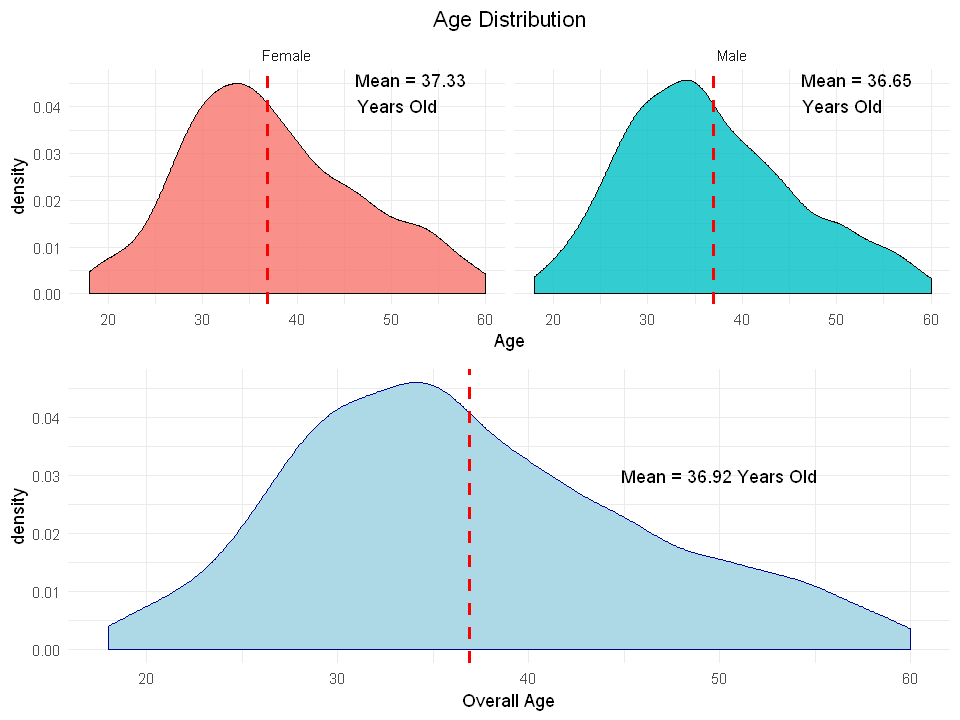

In [12]:
options(repr.plot.width=8, repr.plot.height=6) 

dat_text <- data.frame(
  label = c("Mean = 37.33 \n Years Old", "Mean = 36.65 \n Years Old"),
  Gender   = c("Female", "Male")
)

gender.dist <- data %>% select(Gender, Age) %>% filter(Gender == 'Male' | Gender== "Female") %>% 
filter(!is.na(Age)) %>% group_by(Gender) %>% 
ggplot(aes(x=Age)) + geom_density(aes(fill=Gender), alpha=0.8, show.legend=FALSE) + facet_wrap(~Gender) + theme_minimal() + 
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1) + labs(title="Age Distribution") + 
theme(plot.title=element_text(hjust=0.5)) + 
geom_text(
  data    = dat_text,
  mapping = aes(x = 45, y = 0.03, label = label),
  hjust   = -0.1,
  vjust   = -1
)

overall.dist <- data %>% select(Gender, Age) %>% filter(!is.na(Age)) %>% 
ggplot(data=data, mapping=aes(x=Age)) + geom_density(color="darkblue", fill="lightblue") + 
geom_vline(aes(xintercept=mean(Age)),
            color="red", linetype="dashed", size=1) +  theme_minimal() + labs(x="Overall Age") + 
annotate("text", label = "Mean = 36.92 Years Old", x = 50, y = 0.03, color = "black")


plot_grid(gender.dist, overall.dist, nrow=2)

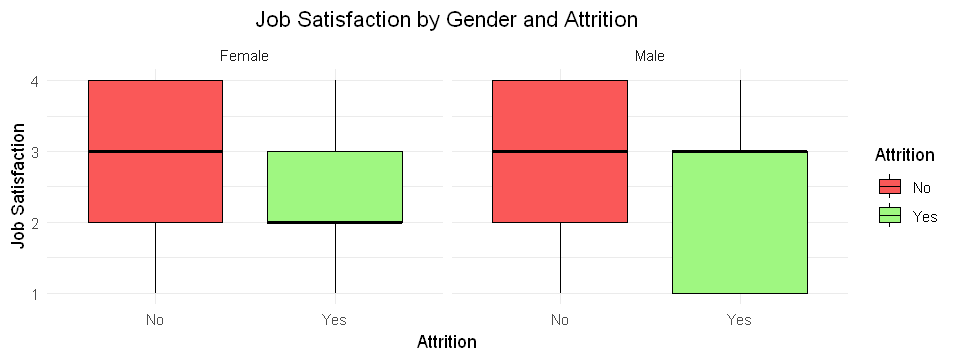

In [13]:
# distribtuion of job satisfaction
options(repr.plot.width=8, repr.plot.height=3) 

box.attrition <- data %>% select(Attrition, JobSatisfaction, Gender) %>% 
ggplot(aes(x=Attrition, y=JobSatisfaction, fill=Attrition)) + geom_boxplot(color="black") + theme_minimal() + facet_wrap(~Gender) + 
scale_fill_manual(values=c("#FA5858", "#9FF781")) + labs(title="Job Satisfaction by Gender and Attrition",y="Job Satisfaction") +
theme(plot.title = element_text(hjust = 0.5))
box.attrition

In [14]:
avg_income <- data %>% group_by(Attrition) %>% summarise(avg=mean(MonthlyIncome))
avg_income

Attrition,avg
No,6832.740
Yes,4787.093


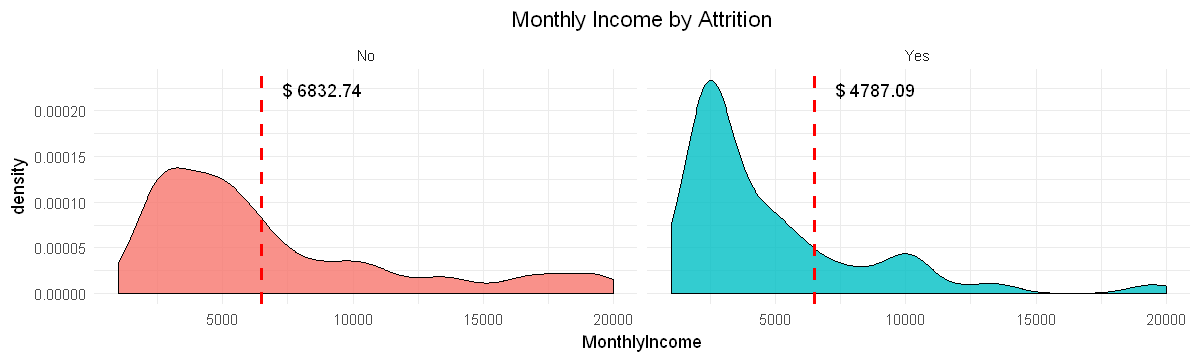

In [15]:
# let's discover salary 
options(repr.plot.width=10, repr.plot.height=3) 
p1 <- data %>% group_by(Attrition)  %>% ggplot(aes(x=MonthlyIncome)) + geom_density(aes(fill=Attrition),alpha=0.8, show.legend = FALSE) + 
    facet_wrap(~Attrition) +
    geom_vline(aes(xintercept=mean(MonthlyIncome)),color='red',linetype='dashed',size=1) + 
    geom_text(data=avg_income, 
            mapping=aes(x=7000, y=0.0002, label=paste("$",round(avg,2))),
            hjust=-0.1,
            vjust=-1)+ theme_minimal() + 
    labs(title="Monthly Income by Attrition") + theme(plot.title = element_text(hjust = 0.5))
p1

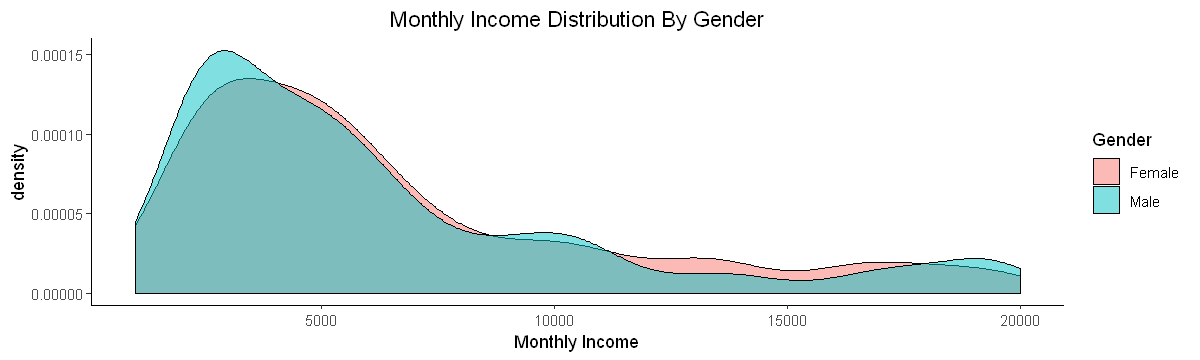

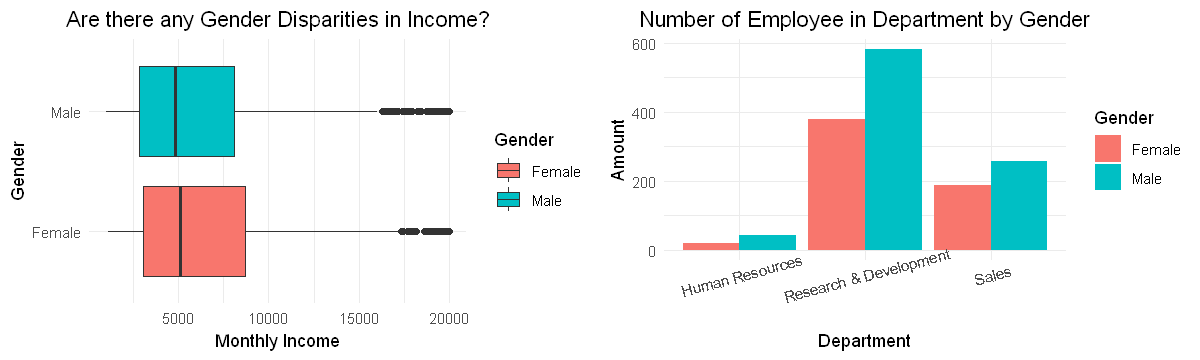

In [16]:
p1 <- data %>% ggplot(aes(x=MonthlyIncome, fill=Gender)) + geom_density(alpha=0.5) + theme_classic() + 
    labs(title="Monthly Income Distribution By Gender",x="Monthly Income") + 
    theme(plot.title = element_text(hjust=0.5))

p2 <- data %>% group_by(Attrition) %>% ggplot(aes(x=Gender,y=MonthlyIncome,fill=Gender)) + geom_boxplot() + coord_flip() + 
    labs(title="Are there any Gender Disparities in Income?", y="Monthly Income") + 
    theme_minimal() + theme(plot.title = element_text(hjust=0.5))

p3 <- data %>% select(Department,Gender) %>% group_by(Department,Gender) %>% summarise(Count=n()) %>%
    ggplot(aes(x=Department,y=Count,fill=Gender)) + geom_bar(stat='identity',position = 'dodge') + theme_minimal() + 
    labs(title="Number of Employee in Department by Gender",y='Amount') + 
theme(plot.title = element_text(hjust=0.5), axis.text.x = element_text(angle = 15))
p1
plot_grid(p2,p3, nrow=1)

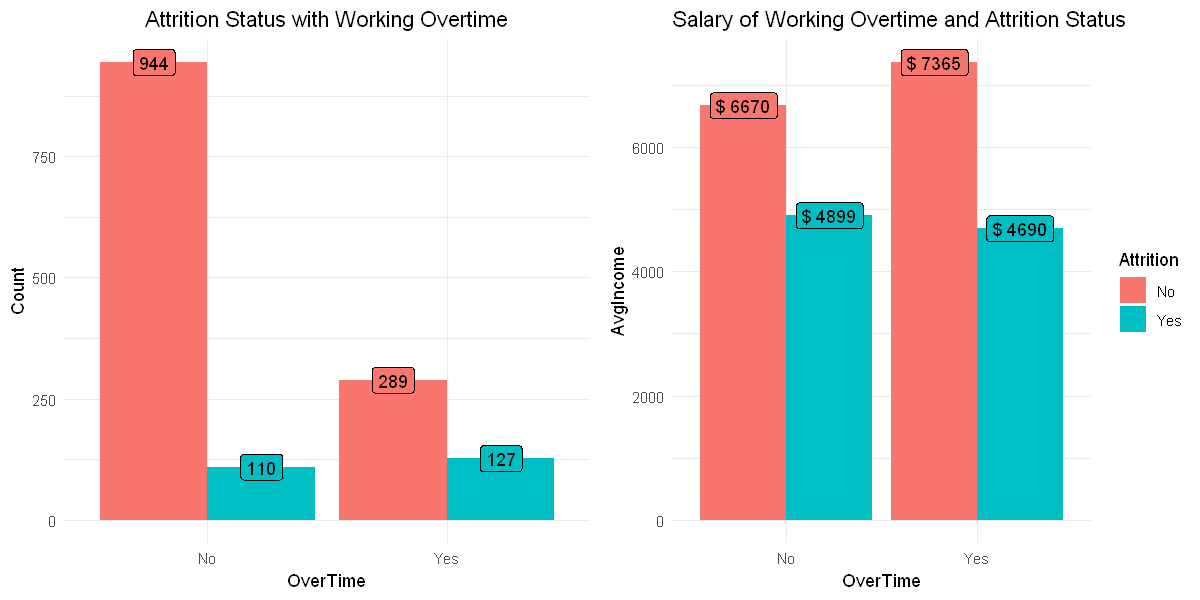

In [17]:
# need to provide label for the plot
options(repr.plot.width=10, repr.plot.height=5) 
p1 <- data %>% group_by(OverTime, Attrition) %>% summarise(Count=n()) %>% ggplot(aes(x=OverTime,y=Count,fill=Attrition)) + 
        geom_bar(aes(),stat = 'identity', position = 'dodge') + labs(title="Attrition Status with Working Overtime") +
        geom_label(aes(label=Count), position = position_dodge(width = 0.9), show.legend = FALSE) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5), legend.position = 'none') 

p2 <- data %>% group_by(OverTime, Attrition) %>% summarise(AvgIncome = mean(MonthlyIncome)) %>% 
    ggplot(aes(x=OverTime,y=AvgIncome, fill=Attrition)) + geom_bar(stat = 'identity', position = 'dodge') + theme_minimal() +
    geom_label(aes(label=paste0("$ ",round(AvgIncome,0))), position=position_dodge(width=0.9), show.legend = FALSE) + 
    labs(title = "Salary of Working Overtime and Attrition Status")
plot_grid(p1,p2, nrow = 1)

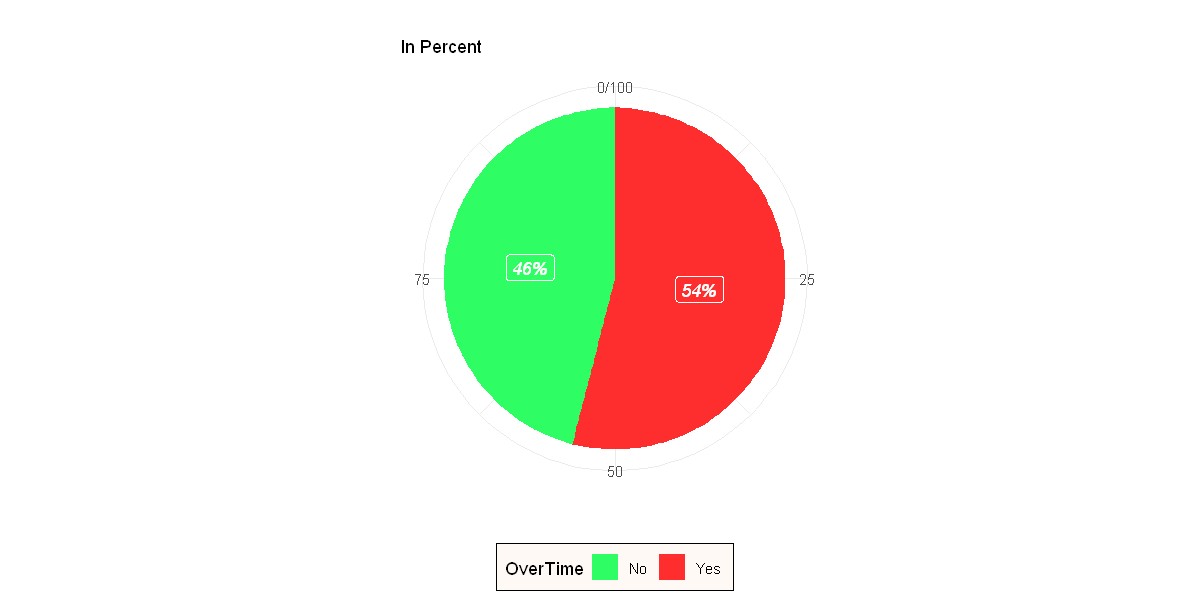

In [18]:
options(repr.plot.width=10, repr.plot.height=5) 


overtime_percent <- data %>% select(OverTime, Attrition) %>% filter(Attrition == "Yes") %>% group_by(Attrition, OverTime) %>%
        summarise(n=n()) %>% mutate(pct=round(prop.table(n),2) * 100) %>% 
        ggplot(aes(x="", y=pct, fill=OverTime)) + theme_minimal() + 
        geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) +
        scale_fill_manual(values=c("#2EFE64", "#FE2E2E")) + 
        geom_label(aes(label = paste0(pct, "%")),show.legend = FALSE, position = position_stack(vjust = 0.5), colour = "white",  fontface = "italic")+
        theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
        plot.title=element_text(hjust=0.5, color="white"), 
          legend.background = element_rect(fill="#FFF9F5",
                                       size=0.5, linetype="solid", colour ="black")) + 
labs(title="Level of Attrition by Overtime Status", subtitle="In Percent", x="", y="") 

overtime_percent

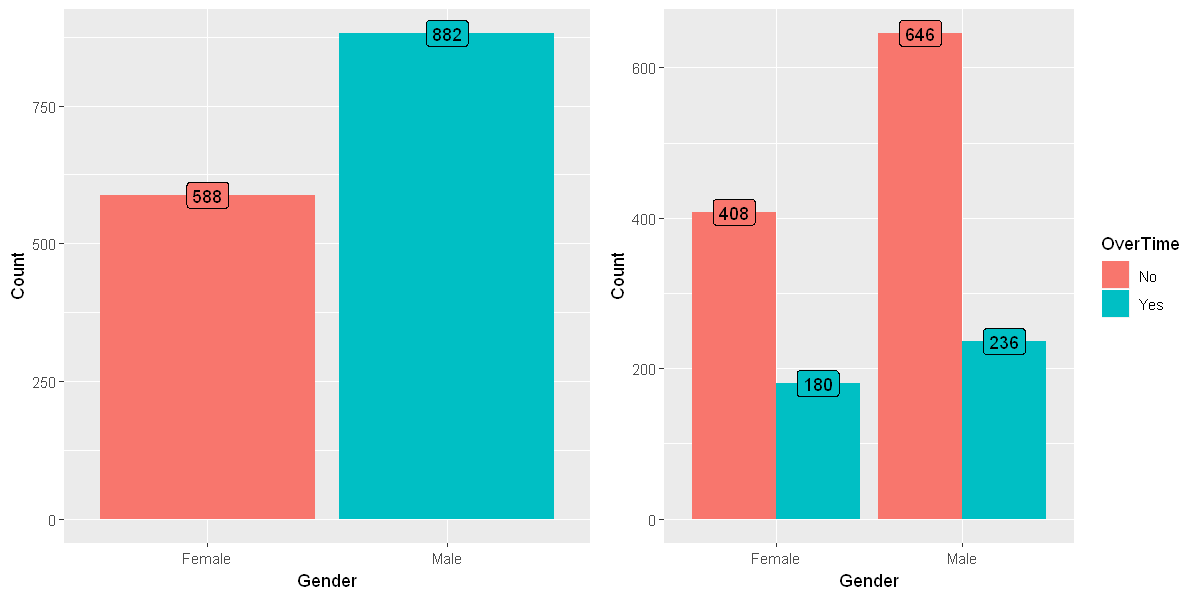

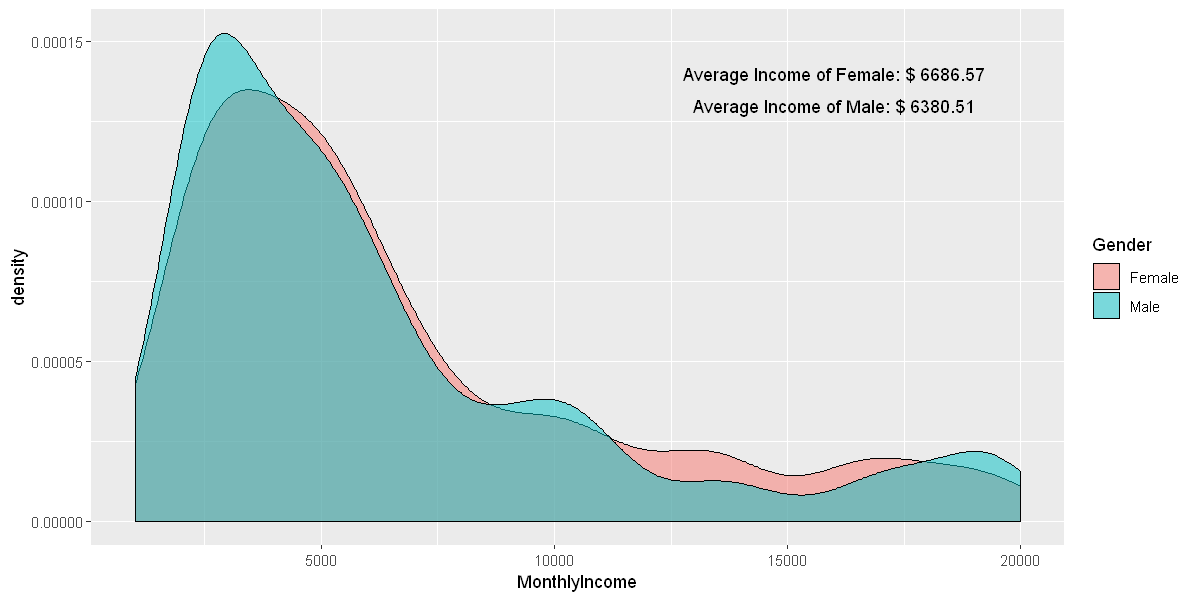

In [19]:
gender_income <- data %>% group_by(Gender) %>% summarise(AvgMonthlyIncome=mean(MonthlyIncome))
p1 <- data %>% group_by(Gender) %>% summarise(Count=n()) %>% ggplot(aes(x=Gender,y=Count,fill=Gender)) + 
    geom_bar(stat = 'identity') + geom_label(aes(label=Count)) + theme(legend.position = 'none')

# i think u should change to percent will be much more better
p2 <- data %>% group_by(Gender,OverTime) %>% summarise(Count=n()) %>% ggplot(aes(x=Gender,y=Count, fill=OverTime)) + 
    geom_bar(stat = 'identity', position = 'dodge') + geom_label(aes(label=Count), position=position_dodge(width=0.9), show.legend = FALSE)
p3 <- data %>% ggplot(aes(x=MonthlyIncome, fill=Gender)) + geom_density(alpha=0.5) +
    annotate("text", x= 16000, y= 0.00014, label=paste("Average Income of Female: $",round(gender_income[gender_income$Gender=='Female',]$AvgMonthlyIncome,2))) +
    annotate("text", x= 16000, y= 0.00013, label=paste("Average Income of Male: $",round(gender_income[gender_income$Gender=='Male',]$AvgMonthlyIncome,2)))

plot_grid(p1,p2)
p3

### Department
Now, im going to discover the relationship between gender and department

1. Find out distribution of department with attrition
2. Gender in each department, and attrition
3. Salary in each department, and attrition


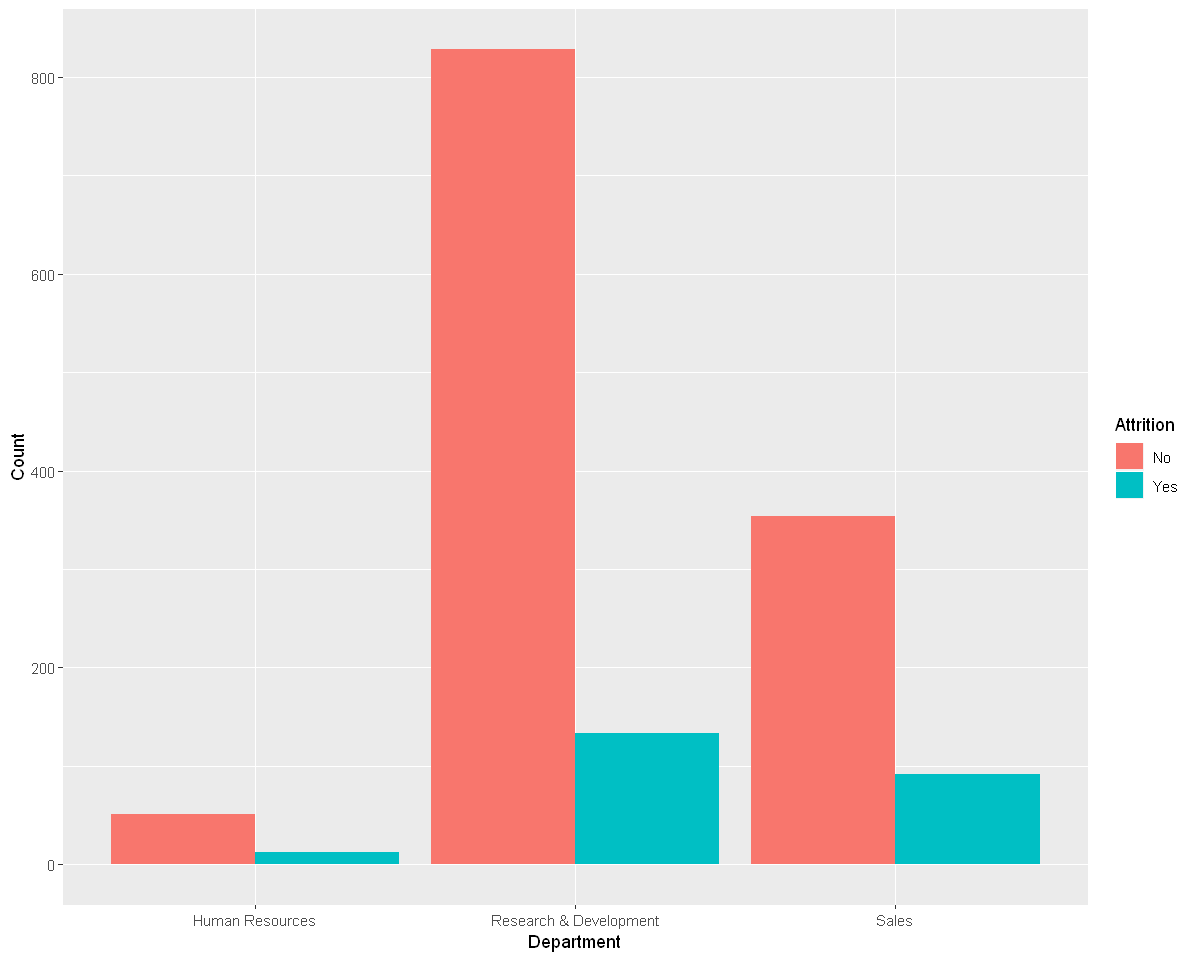

In [20]:
options(repr.plot.width=10, repr.plot.height=8) 
# attrition in department
p1<- data %>% group_by(Department,Attrition) %>% summarise(Count=n()) %>% ggplot(aes(x=Department,y=Count, fill=Attrition)) + 
    geom_bar(stat = 'identity',position = 'dodge') 

# seem like the sale marketing have equal number of people who want to quit them to the Research Department.
# Let see average salary of department from attrition status
p2 <- data %>% group_by(Attrition,Department) %>% summarise(AvgIncome=mean(MonthlyIncome)) %>% 
    ggplot(aes(x=Department,y=AvgIncome,color=Attrition)) + geom_point(size=3) +
    geom_segment(aes(x=Department,xend=Department,y=0,yend=AvgIncome)) + facet_wrap(~Attrition) + 
    geom_text(aes(x=Department, y=3, label=paste("$",round(AvgIncome,2))),hjust=-0.5, vjust=-0.5, angle=360) +
    coord_flip() + theme_minimal()

p1

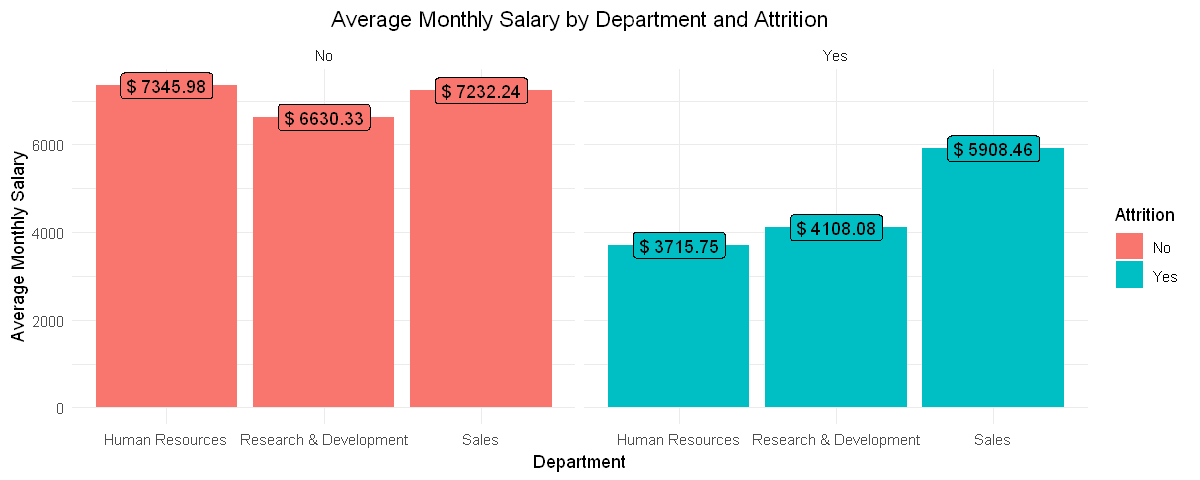

In [21]:
options(repr.plot.width=10, repr.plot.height=4)
data %>% group_by(Department, Attrition) %>% summarise(avg=mean(MonthlyIncome)) %>% 
    ggplot(aes(x=Department,y=avg,fill=Attrition)) + geom_bar(stat='identity') + facet_wrap(~Attrition) + theme_minimal() +
    geom_label(aes(label=paste("$",round(avg,2))),show.legend = FALSE) + 
    labs(title="Average Monthly Salary by Department and Attrition",y="Average Monthly Salary") + 
    theme(plot.title = element_text(hjust=0.5))


### JobRole
Now, im going to discover the relationship of jobrole with other factors

1. Salary of JobRole and Attrition
2. 



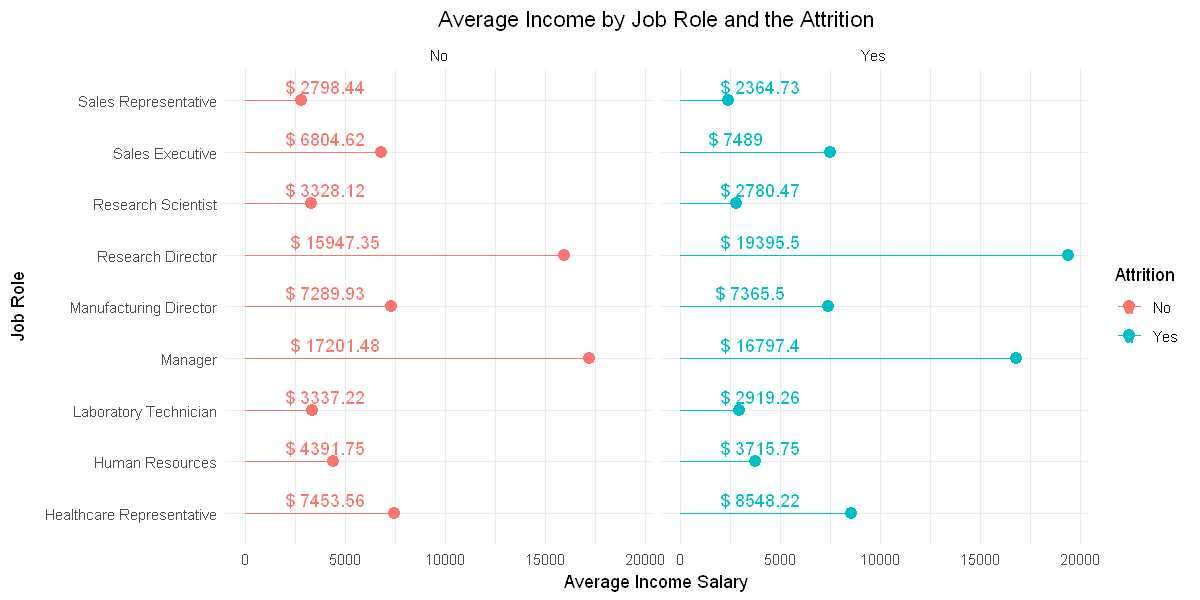

In [22]:
options(repr.plot.width=10, repr.plot.height=5) 
# attrition in department
# seem like the sale marketing have equal number of people who want to quit them to the Research Department.
# Let see average salary of department from attrition status
p2 <- data %>% group_by(Attrition,JobRole) %>% summarise(AvgIncome=mean(MonthlyIncome)) %>% 
    ggplot(aes(x=JobRole,y=AvgIncome,color=Attrition)) + geom_point(size=3) +
    geom_segment(aes(x=JobRole,xend=JobRole,y=0,yend=AvgIncome)) + facet_wrap(~Attrition) + 
    geom_text(aes(x=JobRole, y=0.2, label=paste("$",round(AvgIncome,2))),hjust=-0.5, vjust=-0.5, angle=360) +
    coord_flip() + theme_minimal() + labs(title="Average Income by Job Role and the Attrition",
                                         x= "Job Role", y="Average Income Salary") + 
    theme(plot.title = element_text(hjust=0.5))
p2

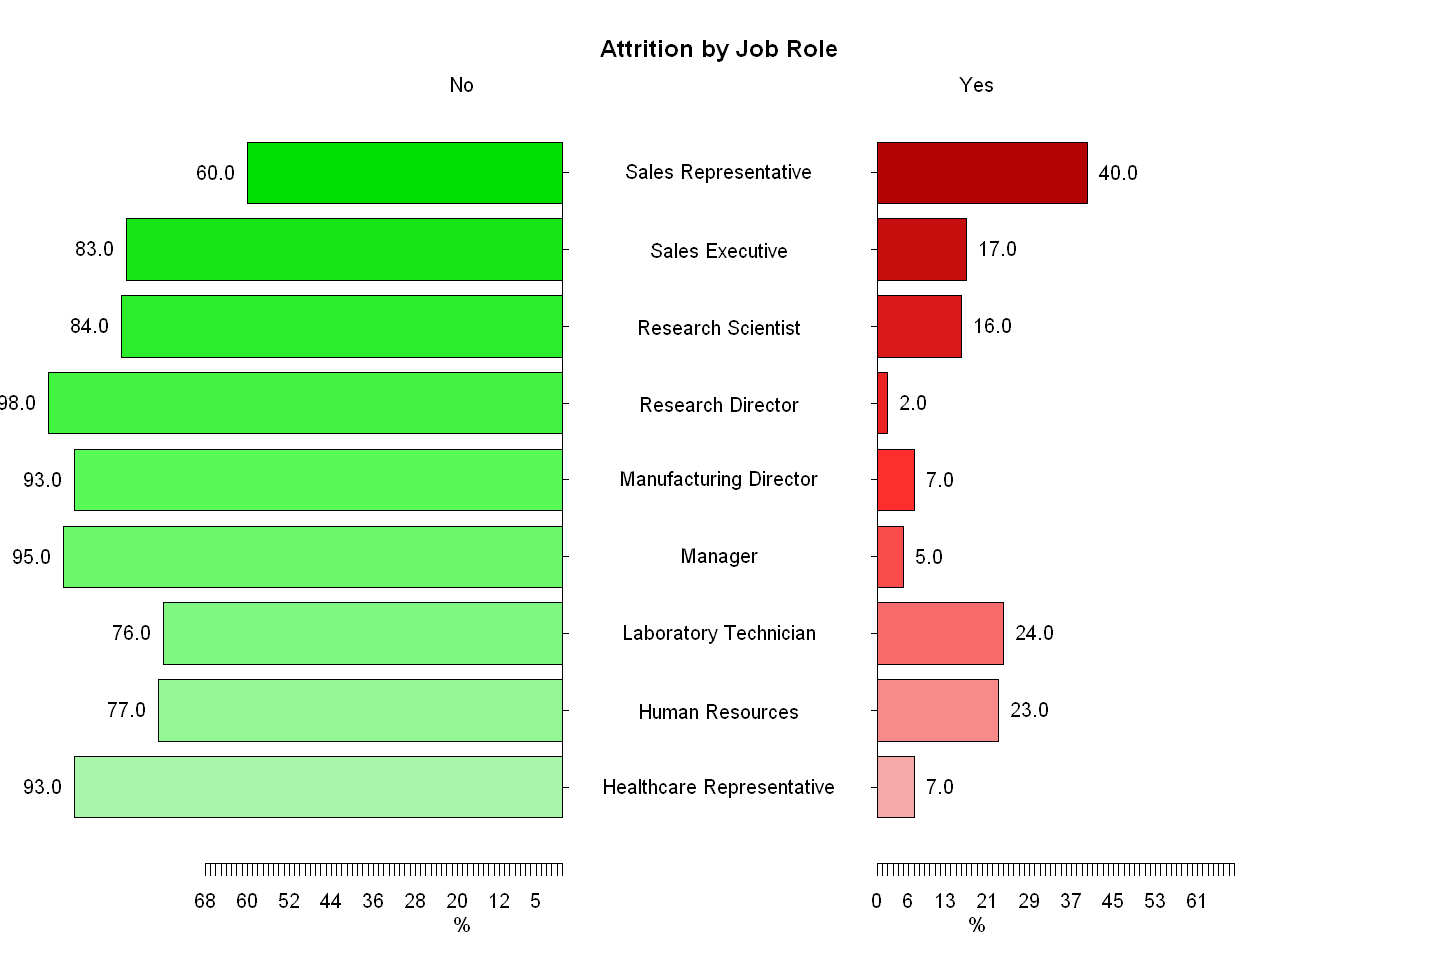

In [23]:
options(repr.plot.width=12, repr.plot.height=8) 
attr.job <- data %>% group_by(JobRole, Attrition) %>% summarise(Count=n()) %>%
mutate(pct=round(prop.table(Count),2) * 100)

nofunc <- colorRampPalette(c("#A9F5A9", "#58FA58", "#01DF01"))
yesfunc <- colorRampPalette(c("#F5A9A9", "#FE2E2E", "#B40404"))

yes.attr <- attr.job %>% filter(Attrition == "Yes") %>% arrange(JobRole) 
no.attr <- attr.job %>% filter(Attrition == "No") %>% arrange(JobRole)

par(mar = pyramid.plot(no.attr$pct, yes.attr$pct, labels = unique(attr.job$JobRole),
                       top.labels=c("No","","Yes"), main = "Attrition by Job Role", 
                       gap=30, show.values = T, rxcol = yesfunc(9), lxcol = nofunc(9)))

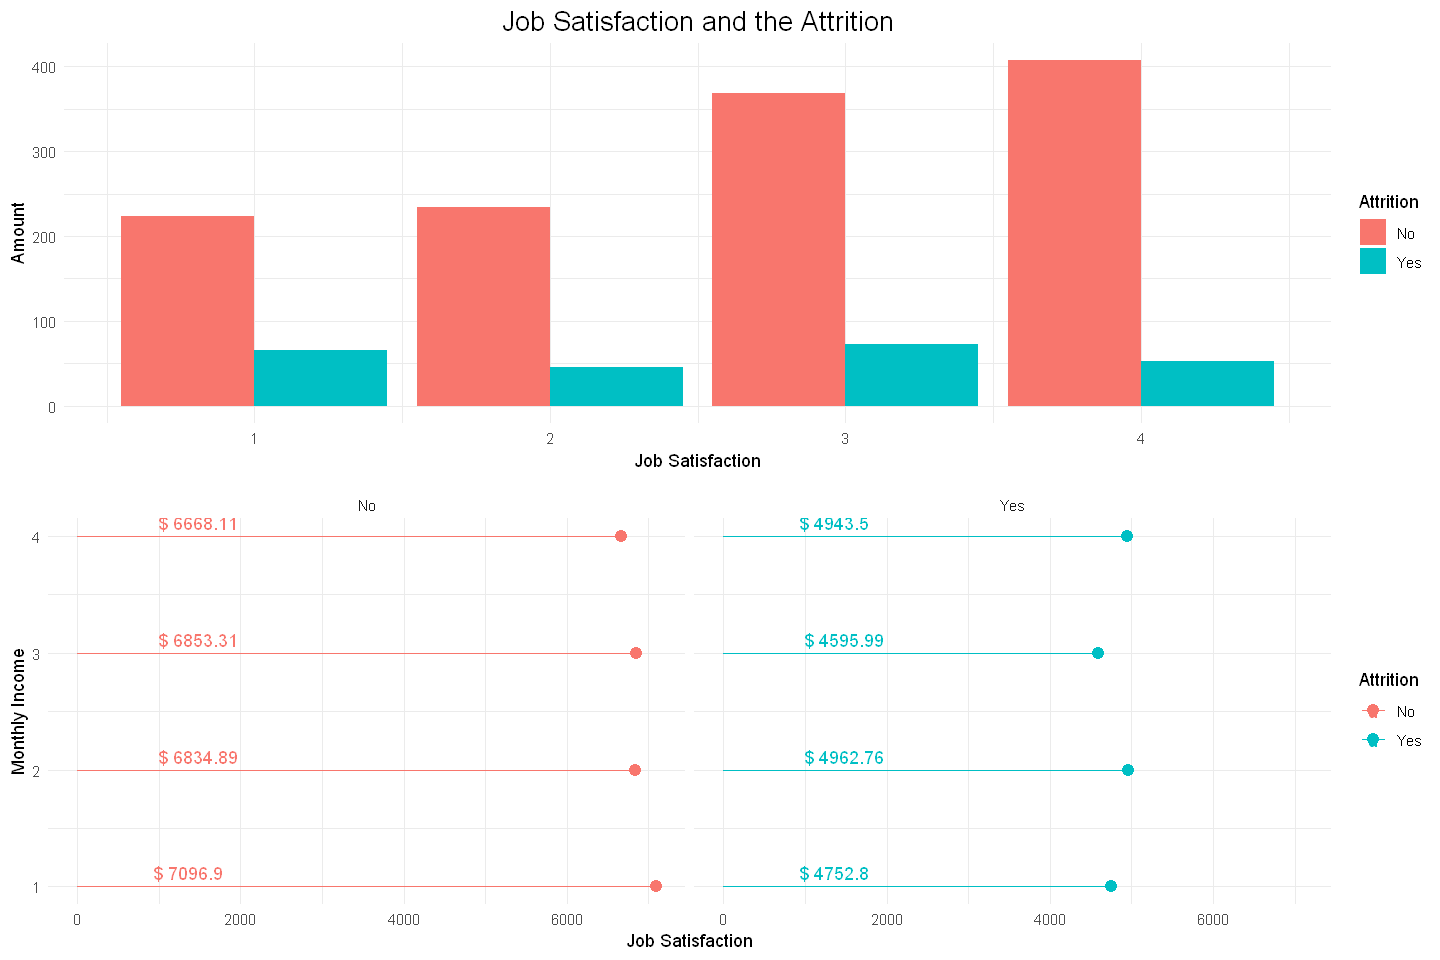

In [24]:
# job satisfaction
options(repr.plot.width=12, repr.plot.height=8) 
p1 <- data %>% group_by(Attrition, JobSatisfaction) %>% summarise(Count=n()) %>% 
    ggplot(aes(x=JobSatisfaction,y=Count,fill=Attrition)) + geom_bar(stat='identity', position='dodge') + theme_minimal() + 
    labs(title="Job Satisfaction and the Attrition", x="Job Satisfaction",y="Amount") + 
    theme(plot.title=element_text(hjust=0.5,size=16))

p2 <- data %>% group_by(Attrition, JobSatisfaction) %>% summarise(avg=mean(MonthlyIncome)) %>%
    ggplot(aes(x=JobSatisfaction,y=avg,color=Attrition)) + geom_point(size=3) + facet_wrap(~Attrition) + coord_flip() + 
    theme_minimal() + geom_segment(aes(x=JobSatisfaction,xend=JobSatisfaction,y=0,yend=avg)) + 
    geom_text(aes(x=JobSatisfaction,y=500, hjust=-0.5,vjust=-0.5,label=paste("$",round(avg,2)))) + 
    labs(x="Monthly Income",y="Job Satisfaction")

plot_grid(p1,p2,nrow=2)

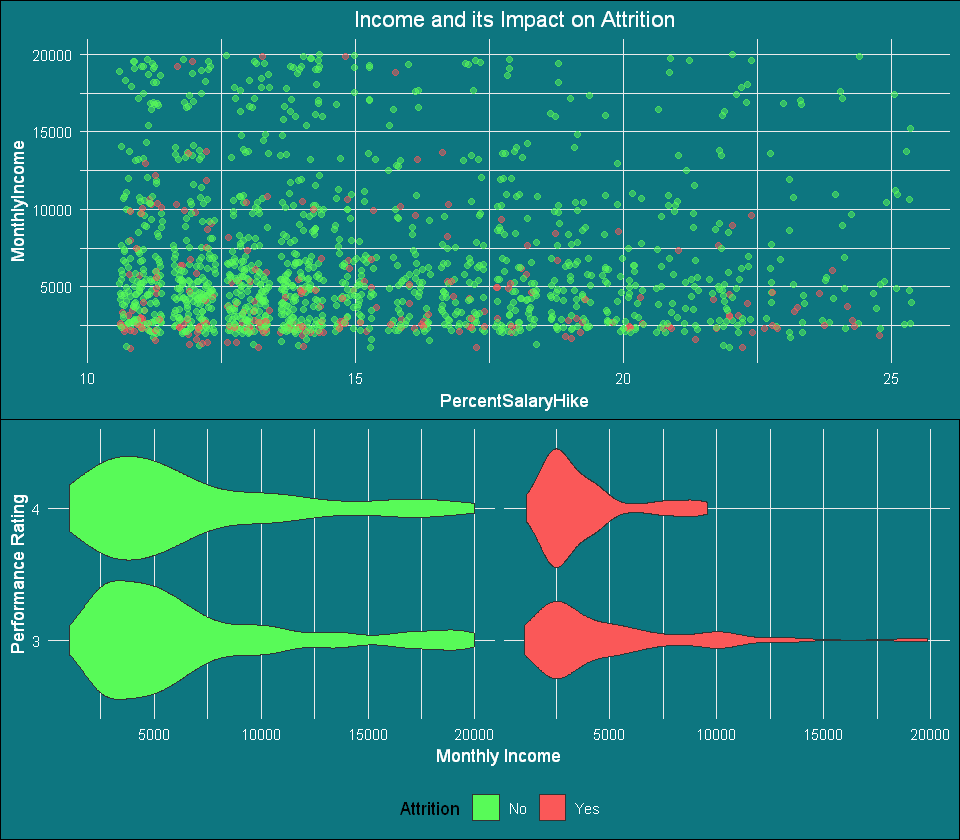

In [25]:
# monthly salary and percent salary hike
options(repr.plot.width=8, repr.plot.height=7) 

p1 <- data %>% select(Attrition, PercentSalaryHike, MonthlyIncome) %>% 
    ggplot(aes(x=PercentSalaryHike, y=MonthlyIncome)) + geom_jitter(aes(col=Attrition), alpha=0.5) + 
    theme(legend.position="none") + scale_color_manual(values=c("#58FA58", "#FA5858")) + theme_minimal()+ 
    labs(title="Income and its Impact on Attrition") + 
    theme(plot.title=element_text(hjust=0.5, color="white"), 
          plot.background=element_rect(fill="#0D7680"), legend.position="none",
          axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
          axis.title=element_text(colour="white"))

p2 <- data %>% select(PerformanceRating, MonthlyIncome, Attrition) %>% group_by(factor(PerformanceRating), Attrition) %>% 
    ggplot(aes(x=factor(PerformanceRating), y=MonthlyIncome, fill=Attrition)) + 
    geom_violin() + coord_flip() + facet_wrap(~Attrition) + 
    scale_fill_manual(values=c("#58FA58", "#FA5858")) + theme_minimal() + 
    theme(legend.position="bottom", strip.background = element_blank(), strip.text.x = element_blank(), 
         plot.title=element_text(hjust=0.5, color="white"), plot.background=element_rect(fill="#0D7680"),
                                                        axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
                                                        axis.title=element_text(colour="white"), 
     legend.text=element_text(color="white")) + 
labs(x="Performance Rating",y="Monthly Income") 


plot_grid(p1, p2, nrow=2)

### Other Factor

1. EnvironmentSatisfaction
2. JobSatisfaction
3. RelationshipSatisfaction
4. JobLevel

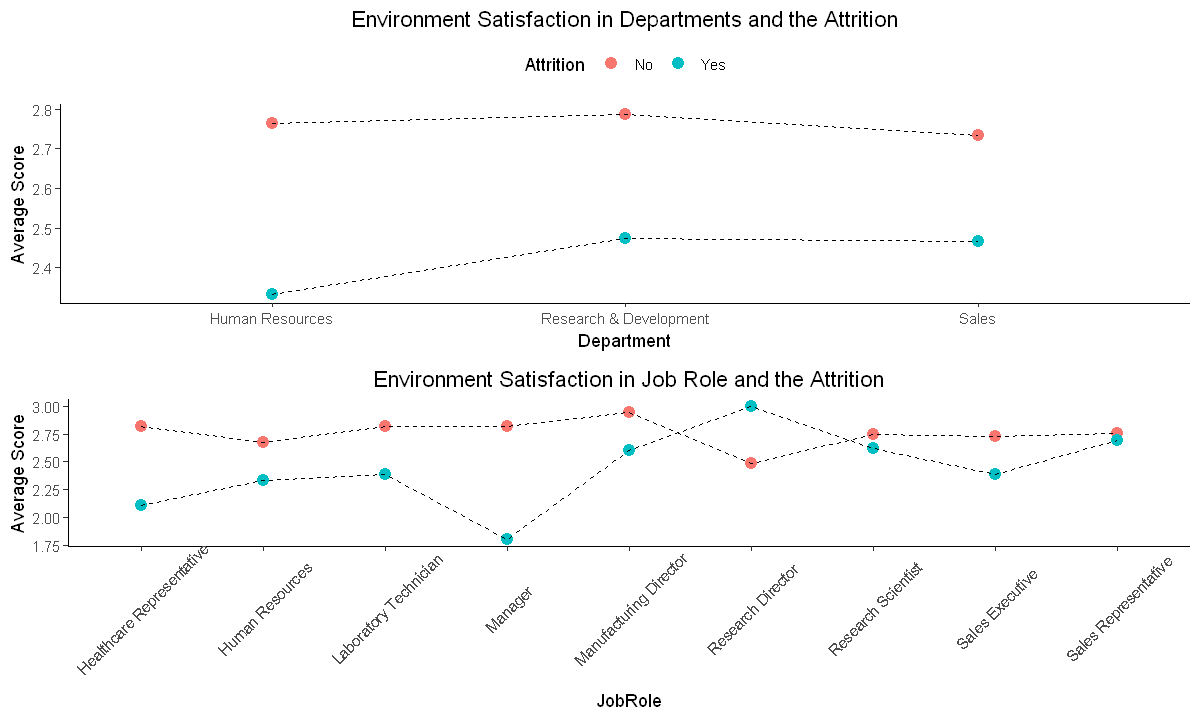

In [26]:
options(repr.plot.width=10, repr.plot.height=6) 
p1 <- data %>% select(EnvironmentSatisfaction, Department, Attrition) %>% group_by(Department,Attrition) %>% 
    summarise(avg = mean(EnvironmentSatisfaction)) %>% ggplot(aes(x=Department,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') +
    labs(title="Environment Satisfaction in Departments and the Attrition", y="Average Score") + 
    theme_classic() + theme(legend.position = "top", plot.title=element_text(hjust=0.5)) 
p2 <- data %>% select(EnvironmentSatisfaction, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
    summarise(avg= mean(EnvironmentSatisfaction)) %>% ggplot(aes(x=JobRole,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') + 
    theme_classic() + labs(title="Environment Satisfaction in Job Role and the Attrition", y="Average Score") + 
    theme(plot.title=element_text(hjust=0.5), axis.text.x = element_text(angle = 45,vjust=0.6), legend.position = 'none')
plot_grid(p1,p2,nrow=2)

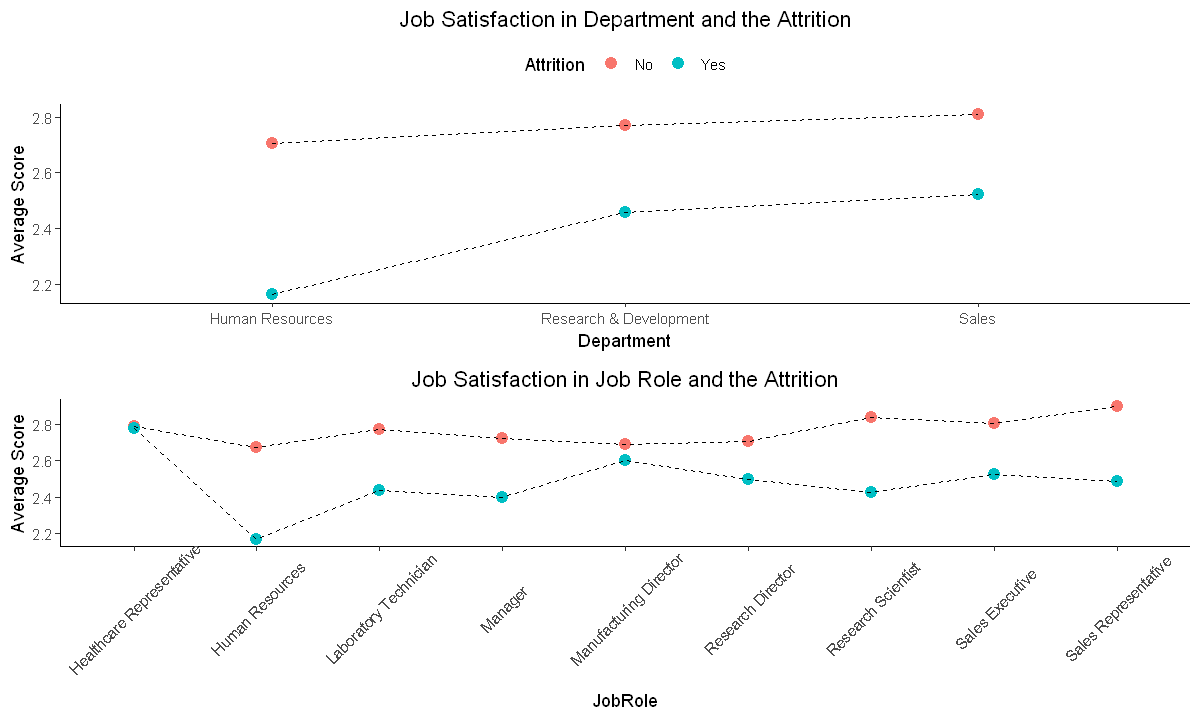

In [27]:
# JobSatisfaction
options(repr.plot.width=10, repr.plot.height=6) 
p1 <- data %>% select(JobSatisfaction, Department, Attrition) %>% group_by(Department,Attrition) %>% 
    summarise(avg = mean(JobSatisfaction)) %>% ggplot(aes(x=Department,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') +
    labs(title="Job Satisfaction in Department and the Attrition", y="Average Score") + 
    theme_classic() + theme(plot.title=element_text(hjust=0.5), legend.position = "top")
p2 <- data %>% select(JobSatisfaction, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
    summarise(avg= mean(JobSatisfaction)) %>% ggplot(aes(x=JobRole,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') + 
    labs(title="Job Satisfaction in Job Role and the Attrition", y="Average Score") + 
    theme_classic() + theme(plot.title=element_text(hjust=0.5),axis.text.x = element_text(angle = 45,vjust=0.6), legend.position = 'none')
plot_grid(p1,p2,nrow=2)

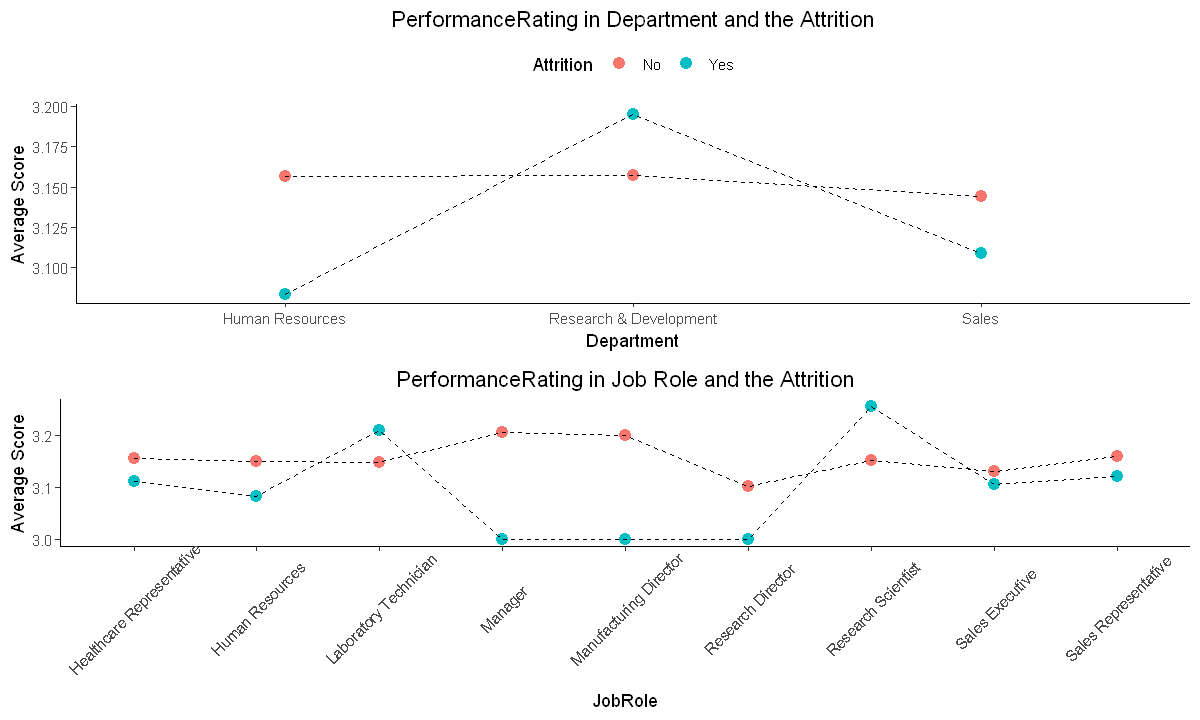

In [28]:
# PerformanceRating
options(repr.plot.width=10, repr.plot.height=6) 
p1 <- data %>% select(PerformanceRating, Department, Attrition) %>% group_by(Department,Attrition) %>% 
    summarise(avg = mean(PerformanceRating)) %>% ggplot(aes(x=Department,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') +
    labs(title="PerformanceRating in Department and the Attrition", y="Average Score") + 
    theme_classic() + theme(plot.title=element_text(hjust=0.5), legend.position = "top")
p2 <- data %>% select(PerformanceRating, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
    summarise(avg= mean(PerformanceRating)) %>% ggplot(aes(x=JobRole,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') + 
    labs(title="PerformanceRating in Job Role and the Attrition", y="Average Score") +
    theme_classic() + theme(plot.title=element_text(hjust=0.5),axis.text.x = element_text(angle = 45,vjust=0.6), legend.position = 'none')
plot_grid(p1,p2,nrow=2)

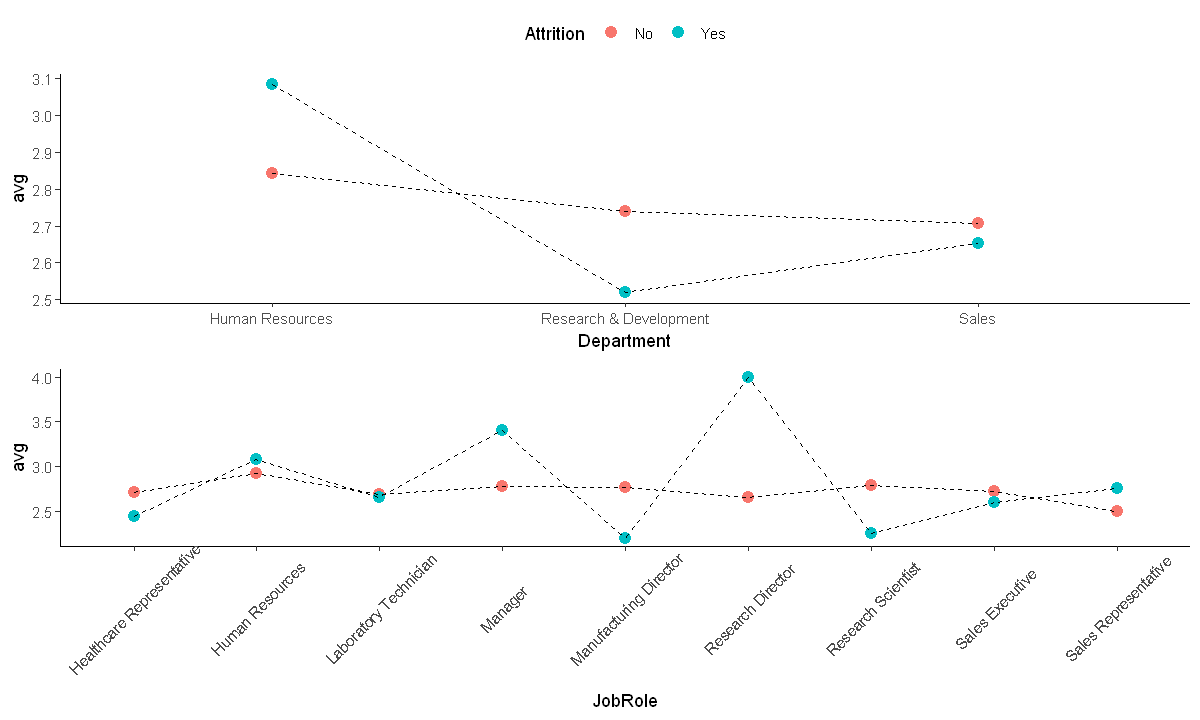

In [29]:
# RelationshipSatisfaction
options(repr.plot.width=10, repr.plot.height=6) 
p1 <- data %>% select(RelationshipSatisfaction, Department, Attrition) %>% group_by(Department,Attrition) %>% 
    summarise(avg = mean(RelationshipSatisfaction)) %>% ggplot(aes(x=Department,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') +
    theme_classic() + theme(legend.position = "top")
p2 <- data %>% select(RelationshipSatisfaction, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
    summarise(avg= mean(RelationshipSatisfaction)) %>% ggplot(aes(x=JobRole,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') + 
    theme_classic() + theme(axis.text.x = element_text(angle = 45,vjust=0.6), legend.position = 'none')
plot_grid(p1,p2,nrow=2)

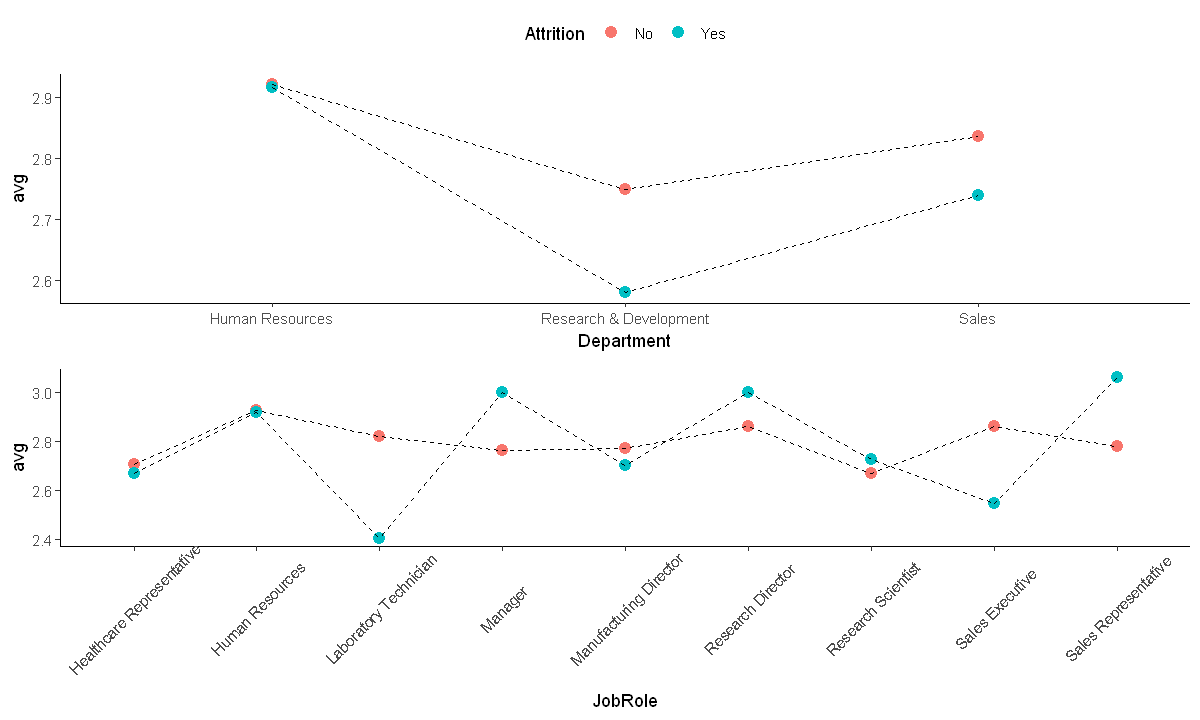

In [30]:
# WorkLifeBalance         
options(repr.plot.width=10, repr.plot.height=6) 
p1 <- data %>% select(WorkLifeBalance, Department, Attrition) %>% group_by(Department,Attrition) %>% 
    summarise(avg = mean(WorkLifeBalance)) %>% ggplot(aes(x=Department,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') +
    theme_classic() + theme(legend.position = "top")
p2 <- data %>% select(WorkLifeBalance, JobRole, Attrition) %>% group_by(JobRole, Attrition) %>%
    summarise(avg= mean(WorkLifeBalance)) %>% ggplot(aes(x=JobRole,y=avg)) + 
    geom_point(aes(color=Attrition),size=3) + geom_line(aes(group=Attrition),linetype='dashed',color='#000000') + 
    theme_classic() + theme(axis.text.x = element_text(angle = 45,vjust=0.6), legend.position = 'none')
plot_grid(p1,p2,nrow=2)

In [31]:
# relationship between salary and percent salaryhike
# already done, do it here


### Dig Down more into Age distribution.


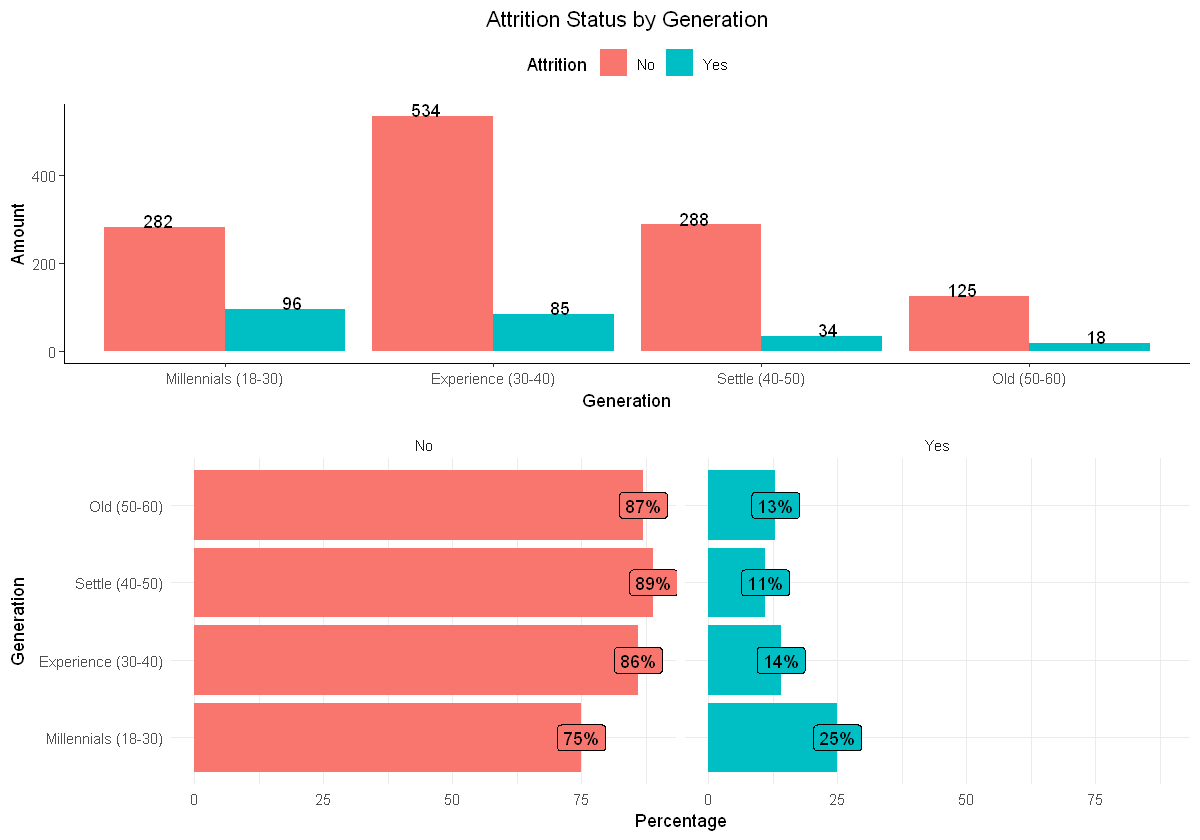

In [32]:
# alright, the distribution is not really greate, probably need to take care more about this classification's criteria 
# now, let the the attrition based on this age 
# let device employee in different generation
# from 18-30, 31 - 40, 41-50, 51-60 with corresponding name: Millennials, Experience, Settle, Old
data$Generation = cut(data$Age,breaks = c(18,30,40,50,60), 
                labels=c("Millennials (18-30)","Experience (30-40)","Settle (40-50)","Old (50-60)"))
options(repr.plot.width=10, repr.plot.height=7)

p1<-data %>% select(Generation, Attrition) %>% filter(!is.na(Generation)) %>% group_by(Generation,Attrition) %>% summarise(Count=n()) %>% 
    ggplot(aes(x=Generation,y=Count,fill=Attrition)) + geom_bar(stat = 'identity', position = 'dodge') + 
    geom_text(aes(x=Generation,y=Count,label=Count),position = position_dodge(width = 1),vjust=0.01) + theme_classic() + 
    theme(legend.position = "top", plot.title = element_text(hjust=0.5)) + 
    labs(title="Attrition Status by Generation", x= "Generation", y="Amount")
p2 <-data %>% select(Generation, Attrition) %>% filter(!is.na(Generation)) %>% group_by(Generation,Attrition) %>% summarise(Count=n()) %>% 
    mutate(pct=round(prop.table(Count),2)*100) %>%
    ggplot(aes(x=Generation,y=pct,fill=Attrition)) + geom_bar(stat = 'identity') +
    geom_label(aes(label=paste0(pct,"%"),fill=Attrition)) + facet_grid(~Attrition) + coord_flip() + theme_minimal() + 
    theme(legend.position = "none") + labs(y="Percentage",x="Generation")
plot_grid(p1,p2,nrow=2)

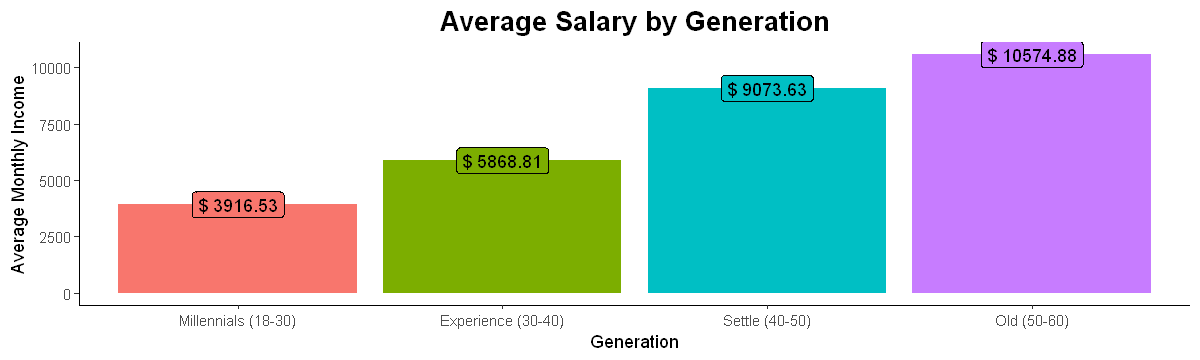

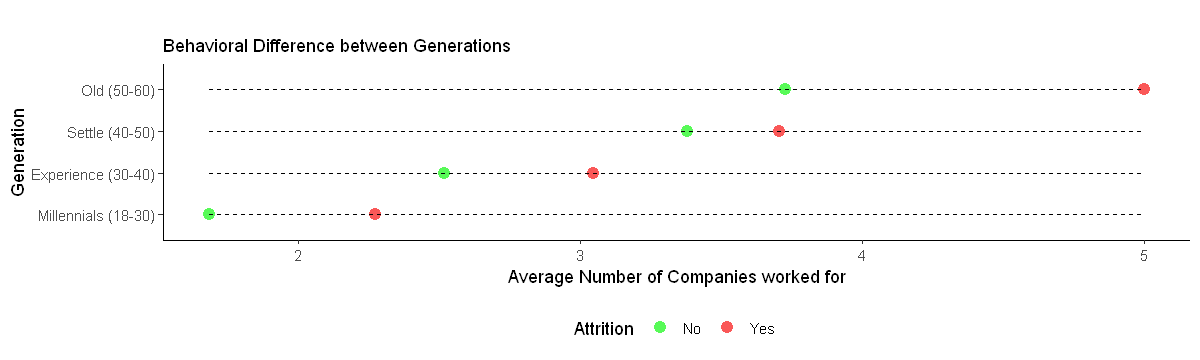

In [33]:
# What about the average salary of this ppl.
#Monthly salary towards the attrtion by generation.
options(repr.plot.width=10, repr.plot.height=3) 
p1 <- data %>% filter(!is.na(Generation)) %>% group_by(Generation) %>% summarise(avg=mean(MonthlyIncome)) %>% 
                ggplot(aes(x=Generation,y=avg, fill=Generation)) + geom_bar(stat = 'identity') + theme_classic() +
    labs(title="Average Salary by Generation", x="Generation",y="Average Monthly Income") + 
    geom_label(aes(label=paste("$",round(avg,2)))) + theme(plot.title=element_text(hjust=0.5,size = 16, face = 'bold'),
                                                        legend.position='none') 

p2 <- data %>% filter(!is.na(Generation)) %>% group_by(Attrition,Generation) %>% summarise(avg=mean(MonthlyIncome)) %>% 
    ggplot(aes(x=Generation,y=avg,col=Attrition)) + geom_point(size=3) + facet_wrap(~Attrition) + theme_minimal() +
    geom_segment(aes(x=Generation,xend=Generation,y=0,yend=avg)) + coord_flip() +
    geom_text(aes(x=Generation,y=2000,vjust=-1.2, label=paste("$",round(avg,2)))) + 
    labs(title="Monthly Income by Generation and Attrition",x="Generation",y="Average Monthly Income") + 
    theme(plot.title=element_text(face = 'bold',size=12,hjust=0.5))

# number of company work before
# p2
p3 <- data %>% filter(!is.na(Generation)) %>% select(Generation, NumCompaniesWorked, Attrition) %>% group_by(Generation, Attrition) %>%
        summarise(avg=mean(NumCompaniesWorked)) %>% ggplot(aes(x=Generation, y=avg, color=Attrition)) + 
        geom_point(size=3) +  # Draw points
        geom_segment(aes(x=Generation, 
                           xend=Generation, 
                           y=min(avg), 
                           yend=max(avg)), 
                           linetype="dashed", 
                           size=0.1,
                           color="black") + theme_classic()+
      labs(title="", subtitle="Behavioral Difference between Generations", y="Average Number of Companies worked for",
          x="Generation") +  coord_flip() + scale_color_manual(values=c("#58FA58", "#FA5858")) + 
      theme(legend.position="bottom",plot.title=element_text(face = 'bold',size=12,hjust=0.5))
 
p1
p3

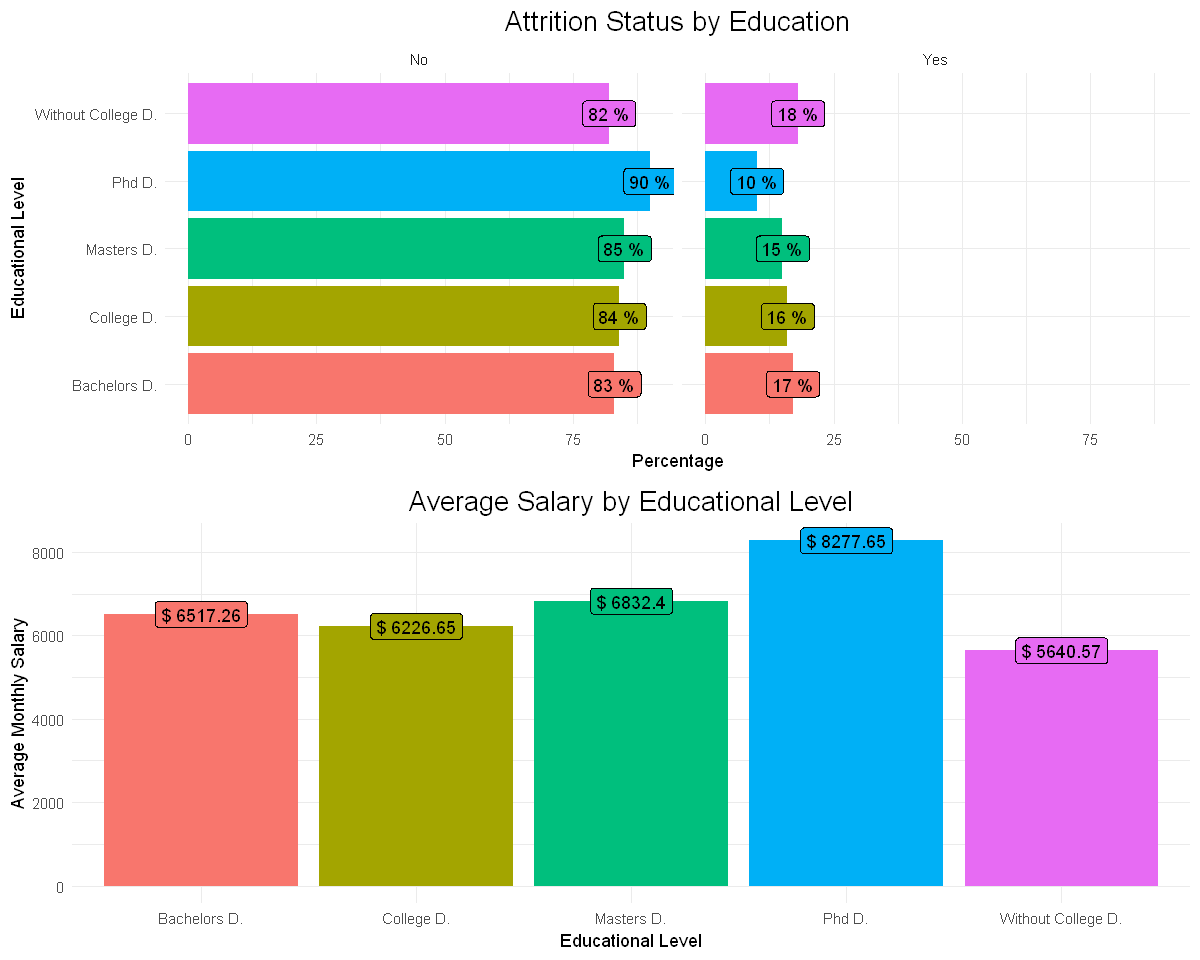

In [35]:
# What about Education and Attrition and Average Salary for Education
options(repr.plot.width=10, repr.plot.height=8) 
data$Educational_Levels <-  ifelse(data$Education == 1, "Without College D.",
                            ifelse(data$Education == 2 , "College D.",
                                  ifelse(data$Education == 3, "Bachelors D.",
                                        ifelse(data$Education == 4, "Masters D.", "Phd D."))))
p1 <- data %>% group_by(Educational_Levels,Attrition) %>% summarise(Count=n()) %>% mutate(pct=round(prop.table(Count),2)*100) %>%
    arrange(desc(pct)) %>%
    ggplot(aes(x=Educational_Levels,y=pct, fill=Educational_Levels)) + geom_bar(stat = 'identity') + 
    facet_wrap(~Attrition) + coord_flip() + geom_label(aes(label=paste(pct,'%')),show.legend = FALSE) + theme_minimal()  + 
    labs(title="Attrition Status by Education", y="Percentage", x="Educational Level")+
    theme(legend.position = 'none', plot.title = element_text(hjust=0.5,size=16))

p2 <- data %>% group_by(Educational_Levels) %>% summarise(avg=mean(MonthlyIncome)) %>% arrange(desc(avg)) %>% 
    ggplot(aes(x=Educational_Levels, y=avg, fill=Educational_Levels)) + geom_bar(stat = 'identity') + 
    geom_label(aes(label=paste("$",round(avg,2)))) + theme_minimal() + 
    labs(title="Average Salary by Educational Level",x="Educational Level",y="Average Monthly Salary") + 
    theme(legend.position = 'none', plot.title=element_text(hjust=0.5,size=16)) 

plot_grid(p1,p2,nrow=2) 

total working years are quite similar to the age i guess, basically, older u get, more likely number of working years u have 


In [36]:
unique(data$YearsWithCurrManager)

[1]  5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14

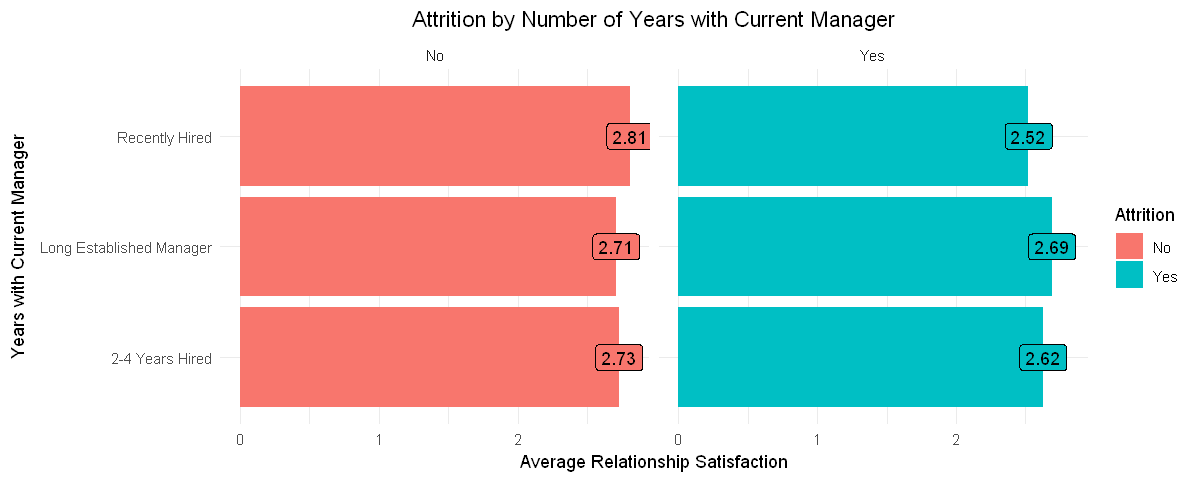

In [37]:
#now, we are going to see the year with curr manager
options(repr.plot.width=10, repr.plot.height=4) 
data$CatYearManager <- ifelse(data$YearsWithCurrManager <=1,"Recently Hired",
                             ifelse(data$YearsWithCurrManager >1 & data$YearsWithCurrManager<=4,"2-4 Years Hired",
                                   "Long Established Manager"))

p1 <- data %>% group_by(CatYearManager, Attrition) %>% summarise(avg=mean(RelationshipSatisfaction)) %>%
    ggplot(aes(x=CatYearManager, y=avg,fill=Attrition)) + geom_bar(stat = 'identity',position = 'dodge') + 
    facet_wrap(~Attrition) + coord_flip() + geom_label(aes(label=round(avg,2)), show.legend = FALSE)
p1 + theme_minimal() + labs(title="Attrition by Number of Years with Current Manager",
                           y = "Average Relationship Satisfaction",
                           x = "Years with Current Manager") + 
    theme(plot.title=element_text(hjust=0.5))

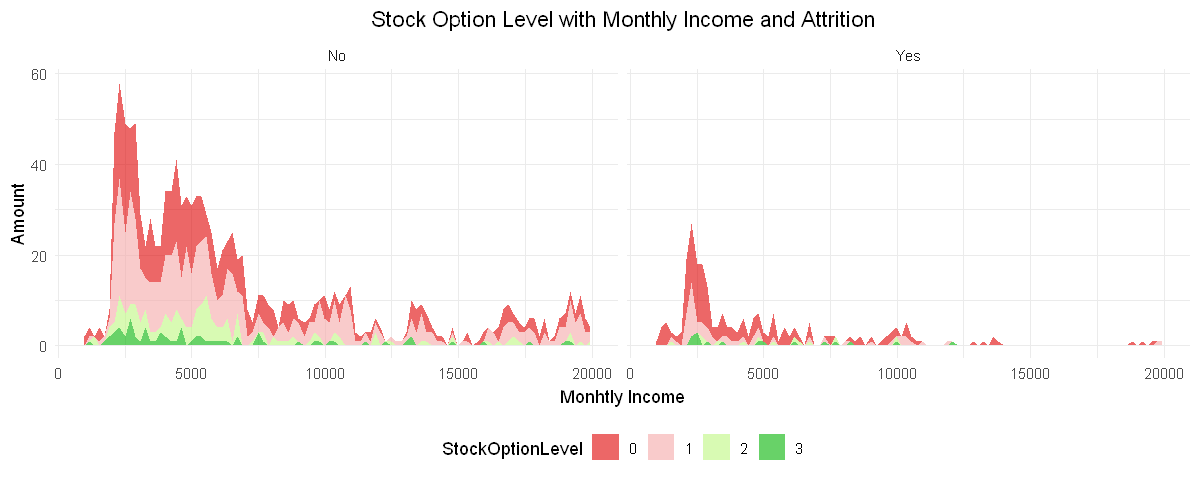

In [38]:
# What about Stock Option
# Frist, any relationship between stock option with monthly salary and attrition
options(repr.plot.width=10, repr.plot.height=4) 
# p1 <- data %>% group_by(Attrition,StockOptionLevel) %>% summarise(avg=mean(MonthlyIncome)) %>%
#     ggplot(aes(x=StockOptionLevel,y=avg,color=Attrition)) + geom_point(size=3) + 
#     geom_segment(aes(x=StockOptionLevel,
#                     xend=StockOptionLevel,
#                     y=0,
#                     yend=avg)) + coord_flip() + facet_wrap(~Attrition) + 
#     geom_text(aes(x=StockOptionLevel,y=1000,label=paste("$",round(avg,2))),hjust=0.5, vjust=-0.5) + theme_minimal()

p1 <- data %>% select(Attrition, StockOptionLevel,MonthlyIncome) %>% group_by(StockOptionLevel, Attrition) %>%
    ggplot(aes(x=MonthlyIncome)) + geom_area(aes(fill=factor(StockOptionLevel)), stat='bin',bins=100,alpha=0.6) +
    facet_wrap(~Attrition) + theme_minimal() + scale_fill_manual(values=c("#DF0101", "#F5A9A9", "#BEF781", "#04B404")) + 
    labs(title="Stock Option Level with Monthly Income and Attrition",
        y="Amount", fill="StockOptionLevel", x="Monhtly Income") + 
    theme(legend.position = 'bottom',plot.title=element_text(hjust=0.5))

p2 <- data %>% group_by(Attrition,StockOptionLevel) %>% summarise(Count=n()) %>% 
    ggplot(aes(x=StockOptionLevel,y=Count, fill=Attrition)) + geom_bar(stat = 'identity', position = 'dodge') + 
    theme_minimal()

p1

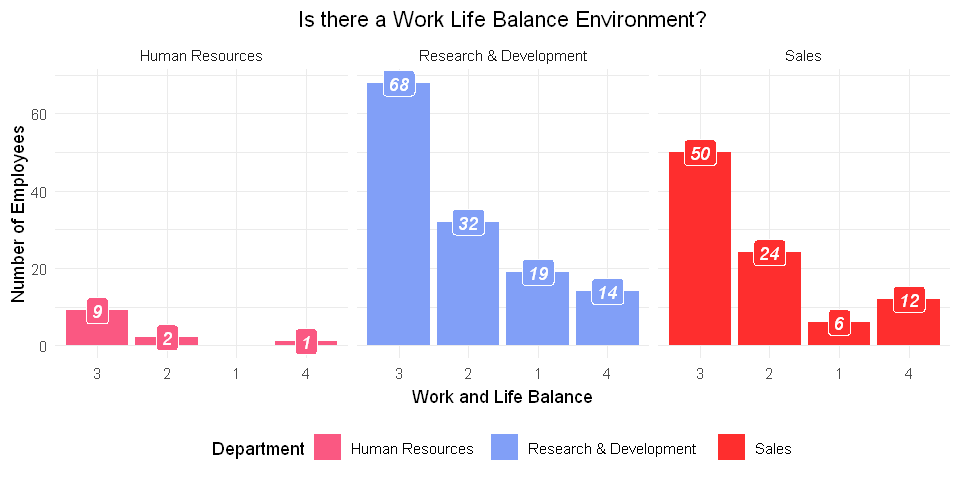

In [39]:
# work life balanced 
options(repr.plot.width=8, repr.plot.height=4)

attritions <- data %>% filter(Attrition == "Yes")

attritions$WorkLifeBalance <- as.factor(attritions$WorkLifeBalance)

by.department <- attritions %>% select(Department, WorkLifeBalance) %>% group_by(Department, WorkLifeBalance) %>%
        summarise(count=n()) %>% 
        ggplot(aes(x=reorder(WorkLifeBalance, -count), y=count, fill=Department)) + geom_bar(stat='identity') + facet_wrap(~Department) +
        theme_minimal()+ 
        theme(legend.position="bottom", plot.title=element_text(hjust=0.5)) + 
        scale_fill_manual(values=c("#FA5882", "#819FF7", "#FE2E2E")) + 
        geom_label(aes(label=count, fill = Department), colour = "white", fontface = "italic", show.legend = FALSE) + 
        labs(title="Is there a Work Life Balance Environment?", x="Work and Life Balance", y="Number of Employees")

by.department

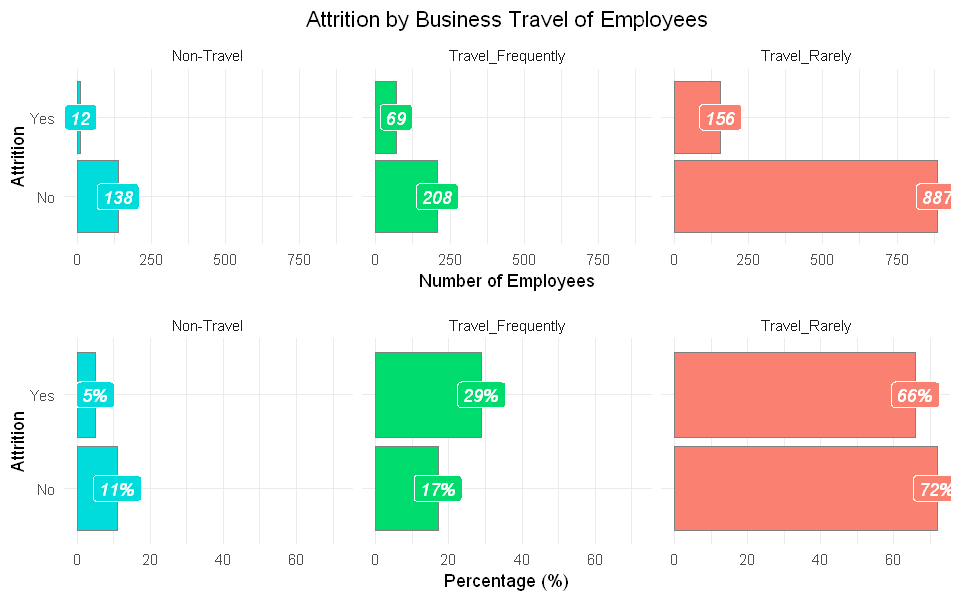

In [40]:
# Business Travel
options(repr.plot.width=8, repr.plot.height=5)


# Percent Attrition by Work Life Balance
work_bal_cnt <- data %>% select(Attrition, BusinessTravel) %>% group_by(Attrition, BusinessTravel) %>% 
summarise(count=n()) %>% mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Attrition, y=count, fill=BusinessTravel, color=Attrition)) + geom_bar(stat='identity') + facet_wrap(~BusinessTravel) + 
geom_label(aes(label=count, fill = BusinessTravel), colour = "white", fontface = "italic")  + theme_minimal() + theme(legend.position="none") + 
scale_fill_manual(values=c("#00dbdb", "#00db6e", "#fa8072")) +
scale_color_manual(values=c("#808080", "#808080")) + labs(title="Attrition by Business Travel of Employees", 
                                                          x="Attrition", y="Number of Employees") + coord_flip() + 
theme(plot.title=element_text(hjust=0.5)) 
        


work_bal_pct <- data %>% select(Attrition, BusinessTravel) %>% group_by(Attrition, BusinessTravel) %>% 
summarise(count=n()) %>% mutate(pct=round(prop.table(count),2) * 100) %>%
ggplot(aes(x=Attrition, y=pct, fill=BusinessTravel, color=Attrition)) + geom_bar(stat='identity') + facet_wrap(~BusinessTravel) + theme_minimal() +  
theme(legend.position="none") + 
geom_label(aes(label=paste0(pct, "%"), fill = BusinessTravel), colour = "white", fontface = "italic")  + 
scale_fill_manual(values=c("#00dbdb", "#00db6e", "#fa8072")) +
scale_color_manual(values=c("#808080", "#808080")) + labs(x="Attrition", y="Percentage (%)") + coord_flip() + 
theme()

plot_grid(work_bal_cnt, work_bal_pct, nrow=2)

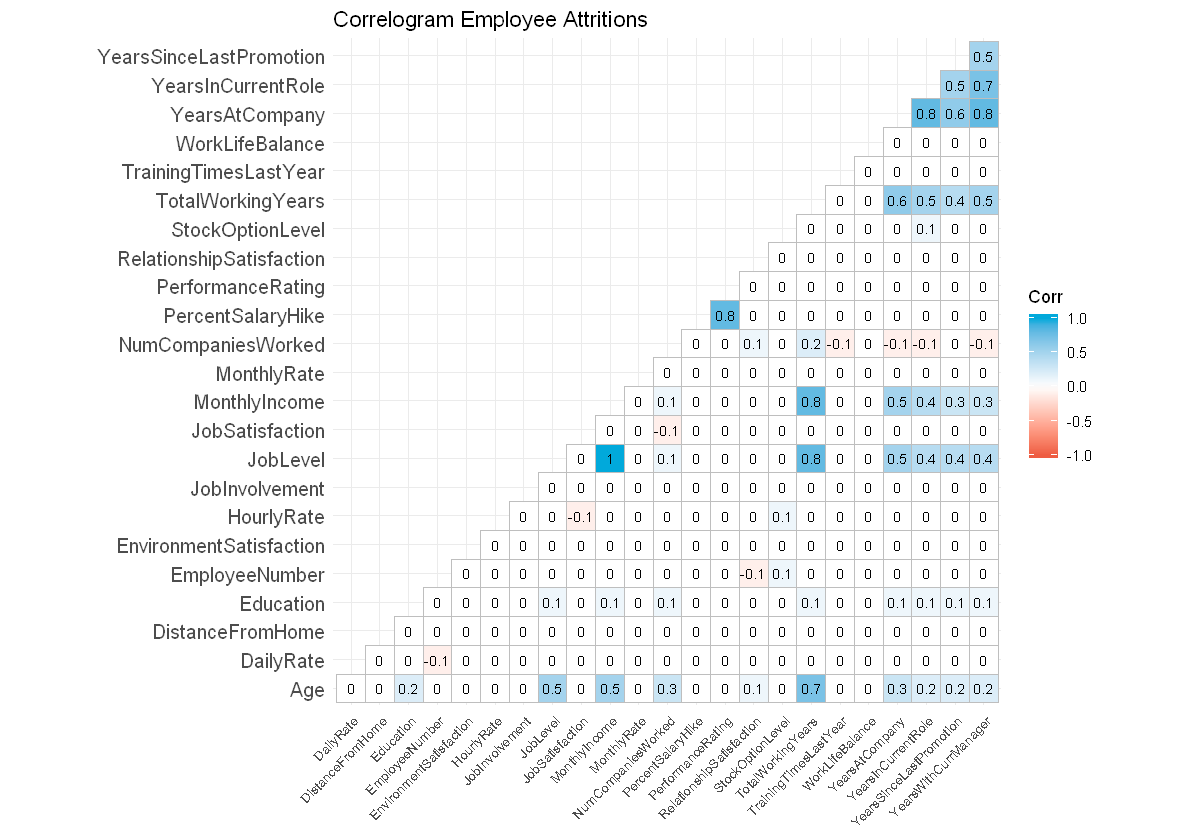

In [41]:
# correlogram
options(repr.plot.width=10, repr.plot.height=7) 
nums <- select_if(data,is.numeric)
corr <- round(cor(nums),1)

ggcorrplot(corr,type = 'lower',lab=TRUE, lab_size=3, method='square',
          colors=c('tomato2','white','#01A9DB'),
          title='Correlogram Employee Attritions') + theme(axis.text.x = element_text(angle = 45,size = 8))

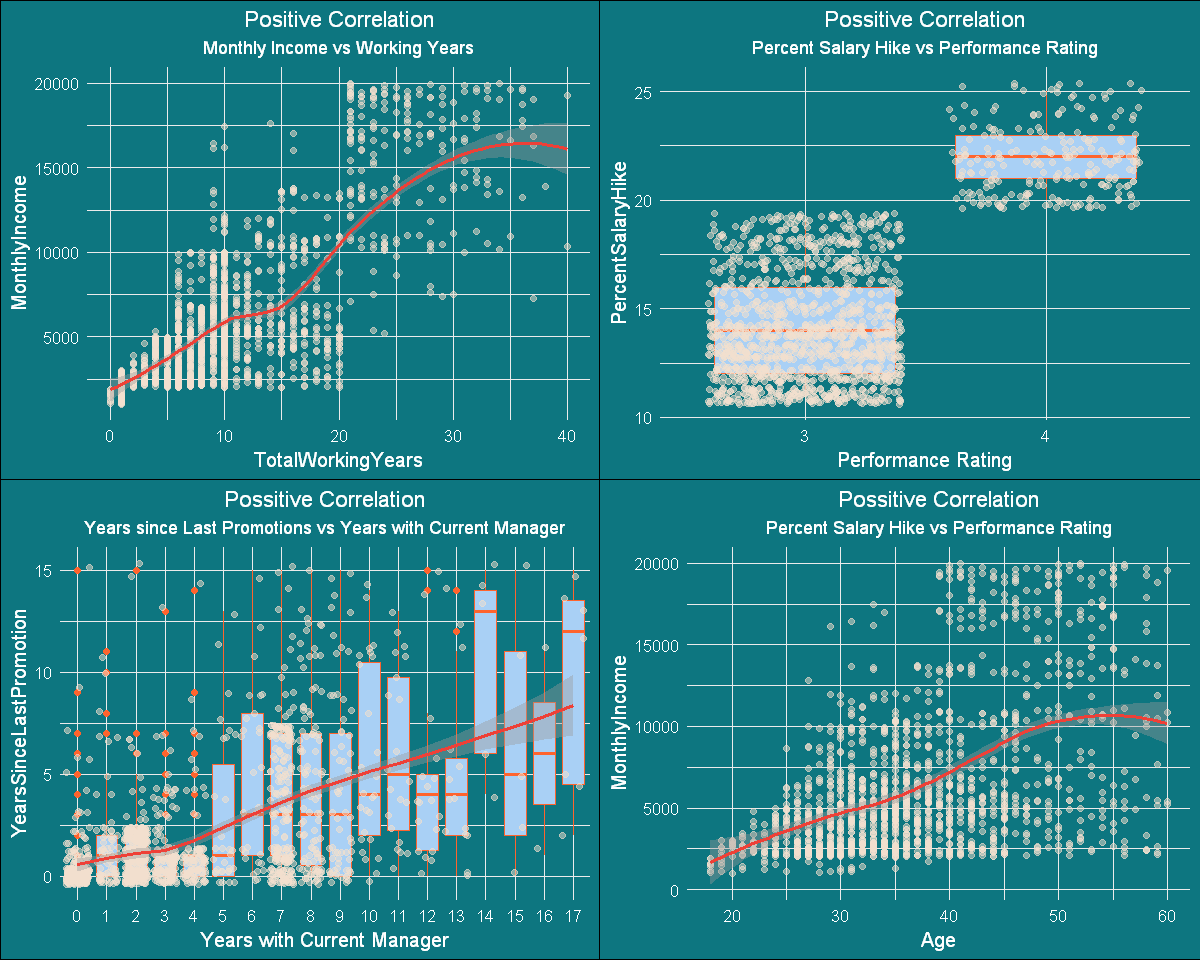

In [42]:
options(repr.plot.width=10, repr.plot.height=8) 
# positive correlation
p1 <- data %>% select(TotalWorkingYears, MonthlyIncome) %>% ggplot(aes(x=TotalWorkingYears,y=MonthlyIncome)) + 
    geom_point(colour="#F2DFCE", alpha=0.5) + geom_smooth(method = 'loess', color="#EE4037") + theme_minimal() + 
    theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5, color="white"), 
        plot.subtitle=element_text(hjust=0.5,color='white'), plot.background=element_rect(fill="#0D7680"),
         axis.title.x=element_text(color='white',size=12), axis.text.x=element_text(color='white', size=10),
         axis.title.y=element_text(color='white',size=12), axis.text.y=element_text(color='white', size=10)) + 
    labs(title="Positive Correlation", subtitle="Monthly Income vs Working Years")


# year with curr manager and year since the last promotion
p3 <- data %>% select(YearsWithCurrManager, YearsSinceLastPromotion) %>%
    ggplot(aes(x=factor(YearsWithCurrManager),y=YearsSinceLastPromotion)) + geom_boxplot(color="#FE642E",fill="#A9D0F5") +
    geom_jitter(color="#F2DFCE",alpha=0.5) + geom_smooth(method = 'loess',color="#EE4037",aes(group=1)) + theme_minimal() + 
    theme(plot.background=element_rect(fill="#0D7680"),plot.title = element_text(hjust = 0.5, color="white"), 
        plot.subtitle=element_text(hjust=0.5,color='white'),
         axis.title.x=element_text(color='white',size=12), axis.text.x=element_text(color='white', size=10),
         axis.title.y=element_text(color='white',size=12), axis.text.y=element_text(color='white', size=10)) + 
    labs(title="Possitive Correlation",subtitle = "Years since Last Promotions vs Years with Current Manager", 
        x="Years with Current Manager")

p2 <- data %>% select(PerformanceRating,PercentSalaryHike) %>% ggplot(aes(x=factor(PerformanceRating),y=PercentSalaryHike)) + 
    geom_boxplot(color="#FE642E", fill="#A9D0F5") + geom_jitter(color="#F2DFCE", alpha=0.5) + theme_minimal() + 
    theme(plot.background=element_rect(fill="#0D7680"),plot.title = element_text(hjust = 0.5, color="white"), 
        plot.subtitle=element_text(hjust=0.5,color='white'),
         axis.title.x=element_text(color='white',size=12), axis.text.x=element_text(color='white', size=10),
         axis.title.y=element_text(color='white',size=12), axis.text.y=element_text(color='white', size=10)) + 
    labs(title="Possitive Correlation",subtitle = "Percent Salary Hike vs Performance Rating", 
        x="Performance Rating")

p4 <- data %>% select(Age,MonthlyIncome) %>% ggplot(aes(x=Age,y=MonthlyIncome)) + geom_point(color="#F2DFCE",alpha=0.5) +
    geom_smooth(method = "loess",color="#EE4037") + theme_minimal() + 
    theme(plot.background=element_rect(fill="#0D7680"),plot.title = element_text(hjust = 0.5, color="white"), 
        plot.subtitle=element_text(hjust=0.5,color='white'),
         axis.title.x=element_text(color='white',size=12), axis.text.x=element_text(color='white', size=10),
         axis.title.y=element_text(color='white',size=12), axis.text.y=element_text(color='white', size=10)) + 
    labs(title="Possitive Correlation",subtitle = "Percent Salary Hike vs Performance Rating", 
        x="Age")

plot_grid(p1,p2,p3,p4,nrow=2)

In [43]:
data$Educational_Levels <- as.factor(data$Educational_Levels)
data$CatYearManager <- as.factor(data$CatYearManager)
data <- data %>% filter(!is.na(Generation))

In [44]:
write.csv(data, "hr_analytics_tableau.csv")

In [199]:
# spliting dataset
set.seed(142)
original_data <- data[sample(nrow(data)),]

# let's encode the factor
original_data$BusinessTravel = factor(original_data$BusinessTravel, 
                                     levels=c('Travel_Frequently', 'Travel_Rarely', 'Non-Travel'),
                                     labels=c(1,2,3))

# change the datatype from integer to factors from ordinal variables
cols <- c("Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
         "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", 
         "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance")

original_data[cols] <- lapply(original_data[cols], factor)

# delete unecessary columns
cols <- c("Over18", "EmployeeNumber", "EmployeeCount")
original_data[cols] <- NULL

# Spliting dataset
train_index <- createDataPartition(original_data$Attrition, p=0.8, list=FALSE, times = 1)

train <- original_data[train_index,]
test <- original_data[-train_index,]

# Checking that both the training and testing sets have the same label proportions
prop_train <- train %>% select(Attrition) %>% group_by(Attrition) %>% summarise(Count=n()) %>% mutate(pct=round(prop.table(Count),2))
prop_test <- test %>% select(Attrition) %>% group_by(Attrition) %>% summarise(Count=n()) %>% mutate(pct=round(prop.table(Count),2))

prop_train
prop_test



Attrition,Count,pct
No,987,0.84
Yes,190,0.16


Attrition,Count,pct
No,246,0.84
Yes,47,0.16


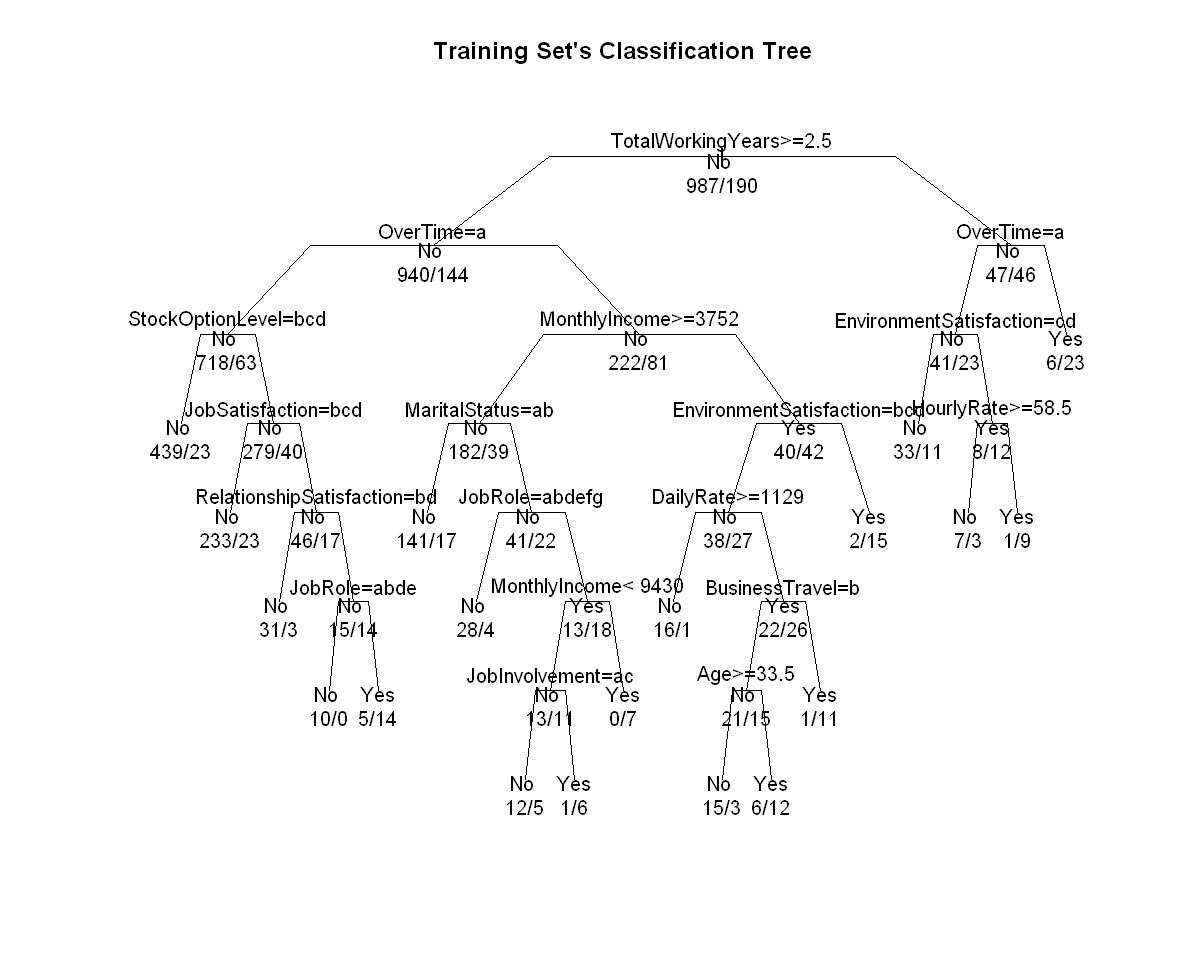

In [200]:
options(repr.plot.width=10, repr.plot.height=8)

rpart.tree <- rpart(Attrition ~ ., data=train)
plot(rpart.tree, uniform=TRUE, branch=0.6, margin=0.05)
text(rpart.tree, all=TRUE, use.n=TRUE)
title("Training Set's Classification Tree")

In [201]:
# the most important feature
var_imp <- data.frame(rpart.tree$variable.importance)
var_imp$features <- rownames(var_imp)
var_imp <- var_imp[,c(2,1)]
var_imp$importance <- round(var_imp$rpart.tree.variable.importance,2)
var_imp$rpart.tree.variable.importance <- NULL


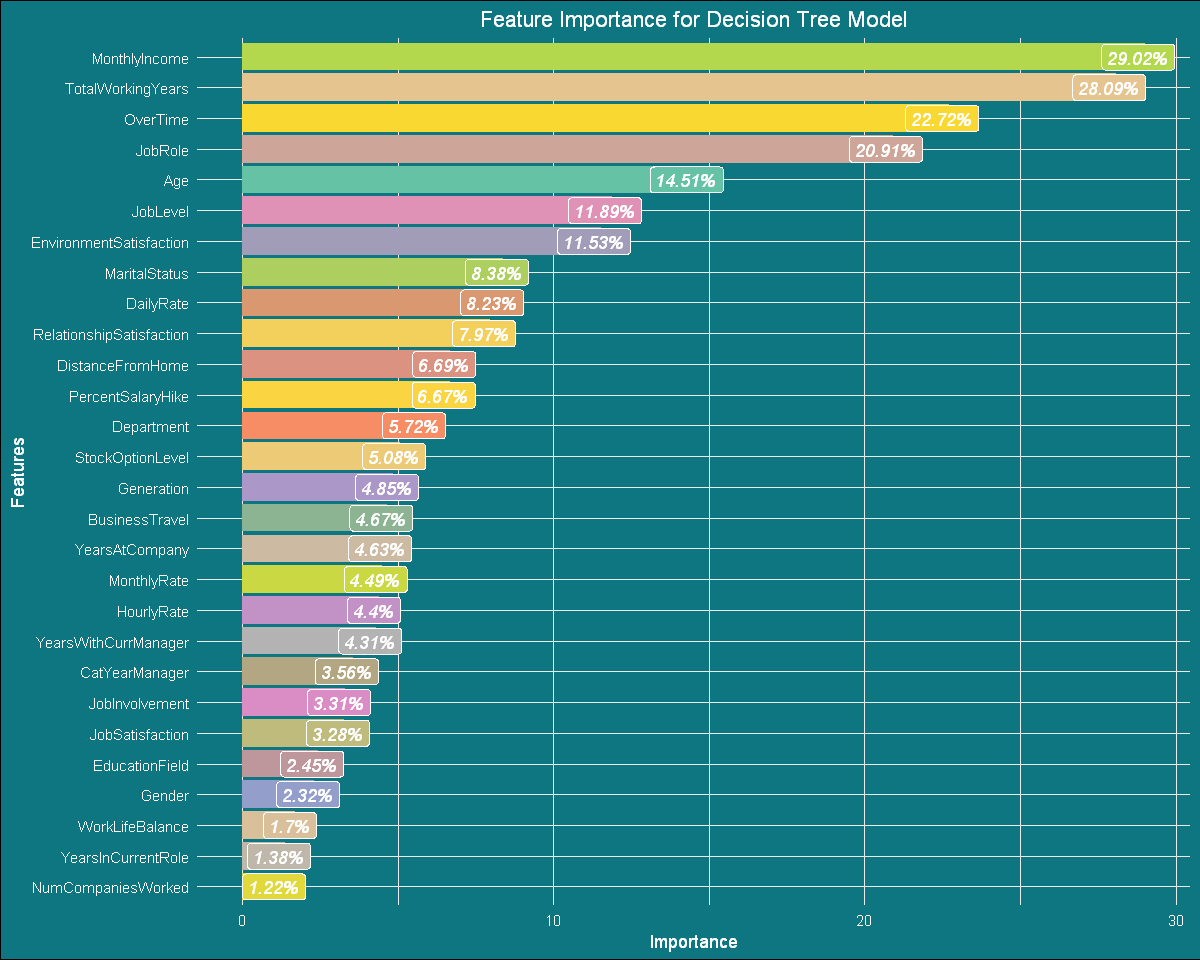

In [202]:
options(repr.plot.width=10, repr.plot.height=8)
colorCount <- length(unique(var_imp$features))
feature_importance <- var_imp %>% ggplot(aes(x=reorder(features,importance),y=importance, fill=features)) + 
    geom_bar(stat = 'identity') + coord_flip() + theme_minimal() + 
    theme(legend.position = 'none',plot.title = element_text(hjust = 0.5, color = 'white'), plot.subtitle = element_text(hjust = 0.5, color = 'white'),
         plot.background=element_rect(fill="#0D7680"), axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
         axis.title=element_text(colour="white"),legend.background=element_rect(fill="#FFF9F5",size=0.5, linetype = "solid",
         color='black')) + scale_fill_manual(values = colorRampPalette(brewer.pal(24, "Set2"))(colorCount)) + 
         geom_label(aes(label=paste0(importance, "%")), colour = "white", fontface = "italic", hjust=0.6) + 
        labs(title="Feature Importance for Decision Tree Model", x="Features", y="Importance")
feature_importance

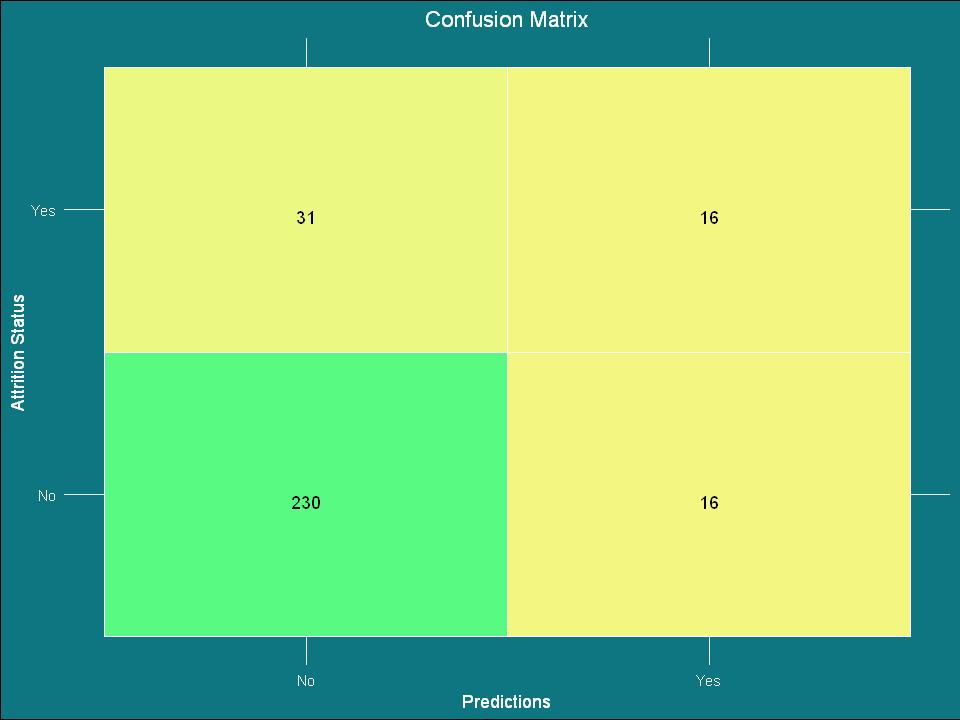

In [203]:
# prediction with confusion matrix
options(repr.plot.width=8, repr.plot.height=6)
test.features <- test %>% select(-Attrition)

predictions <- predict(rpart.tree, test.features, type="class")
conf_df <- data.frame(table(test$Attrition, predictions))

ggplot(data=conf_df, mapping = aes(x=predictions,y=Var1)) + 
    geom_tile(aes(fill=Freq), colour='white') + 
    geom_text(aes(label=sprintf("%1.0f", Freq)), vjust= 1) + 
    scale_fill_gradient(low="#F3F781", high="#58FA82") + theme_minimal() +
    theme(legend.position="none", strip.background = element_blank(), strip.text.x = element_blank(), 
          plot.title=element_text(hjust=0.5, color="white"), plot.subtitle=element_text(color="white"), 
          plot.background=element_rect(fill="#0D7680"), axis.text.x=element_text(colour="white"), axis.text.y=element_text(colour="white"),
          axis.title=element_text(colour="white"), legend.background = element_rect(fill="#FFF9F5",
                                  size=0.5, linetype="solid", 
                                  colour ="black")) + 
labs(title="Confusion Matrix", y="Attrition Status", x="Predictions")

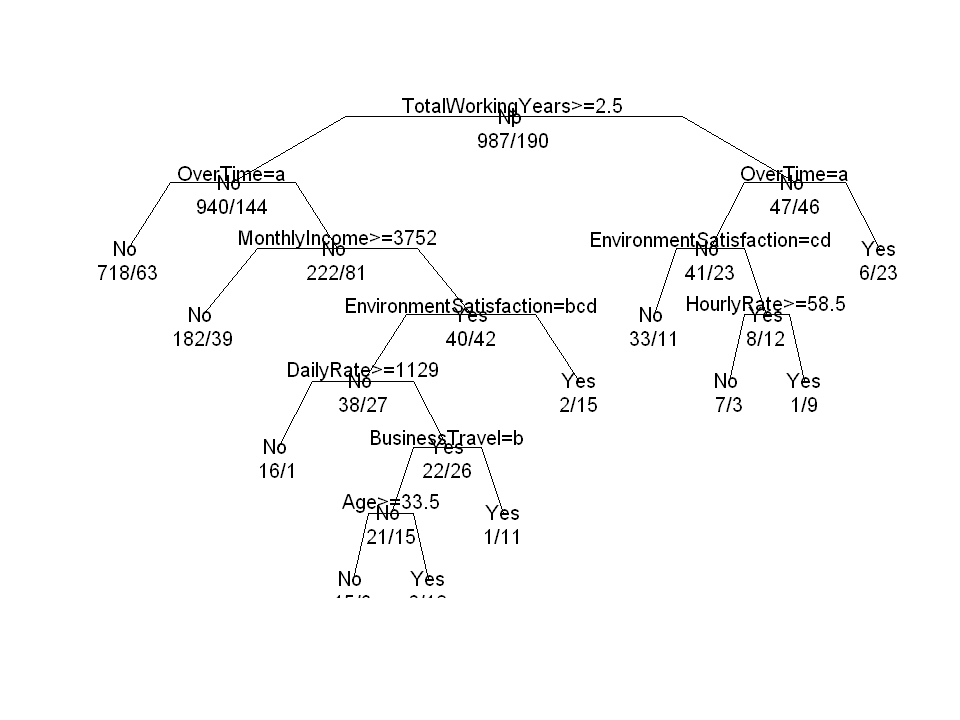

In [204]:
# Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances

prune.rpart.tree <- prune(rpart.tree, cp=0.02) # pruning the tree
plot(prune.rpart.tree, uniform=TRUE, branch=0.6)
text(prune.rpart.tree, all=TRUE, use.n=TRUE)

In [205]:
rparty.tree <- as.party(rpart.tree)
rparty.tree


Model formula:
Attrition ~ Age + BusinessTravel + DailyRate + Department + DistanceFromHome + 
    Education + EducationField + EnvironmentSatisfaction + Gender + 
    HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + 
    MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + 
    OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + 
    StandardHours + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + 
    WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + 
    YearsWithCurrManager + Generation + Educational_Levels + 
    CatYearManager

Fitted party:
[1] root
|   [2] TotalWorkingYears >= 2.5
|   |   [3] OverTime in No
|   |   |   [4] StockOptionLevel in 1, 2, 3: No (n = 462, err = 5.0%)
|   |   |   [5] StockOptionLevel in 0
|   |   |   |   [6] JobSatisfaction in 2, 3, 4: No (n = 256, err = 9.0%)
|   |   |   |   [7] JobSatisfaction in 1
|   |   |   |   |   [8] RelationshipSatisfaction

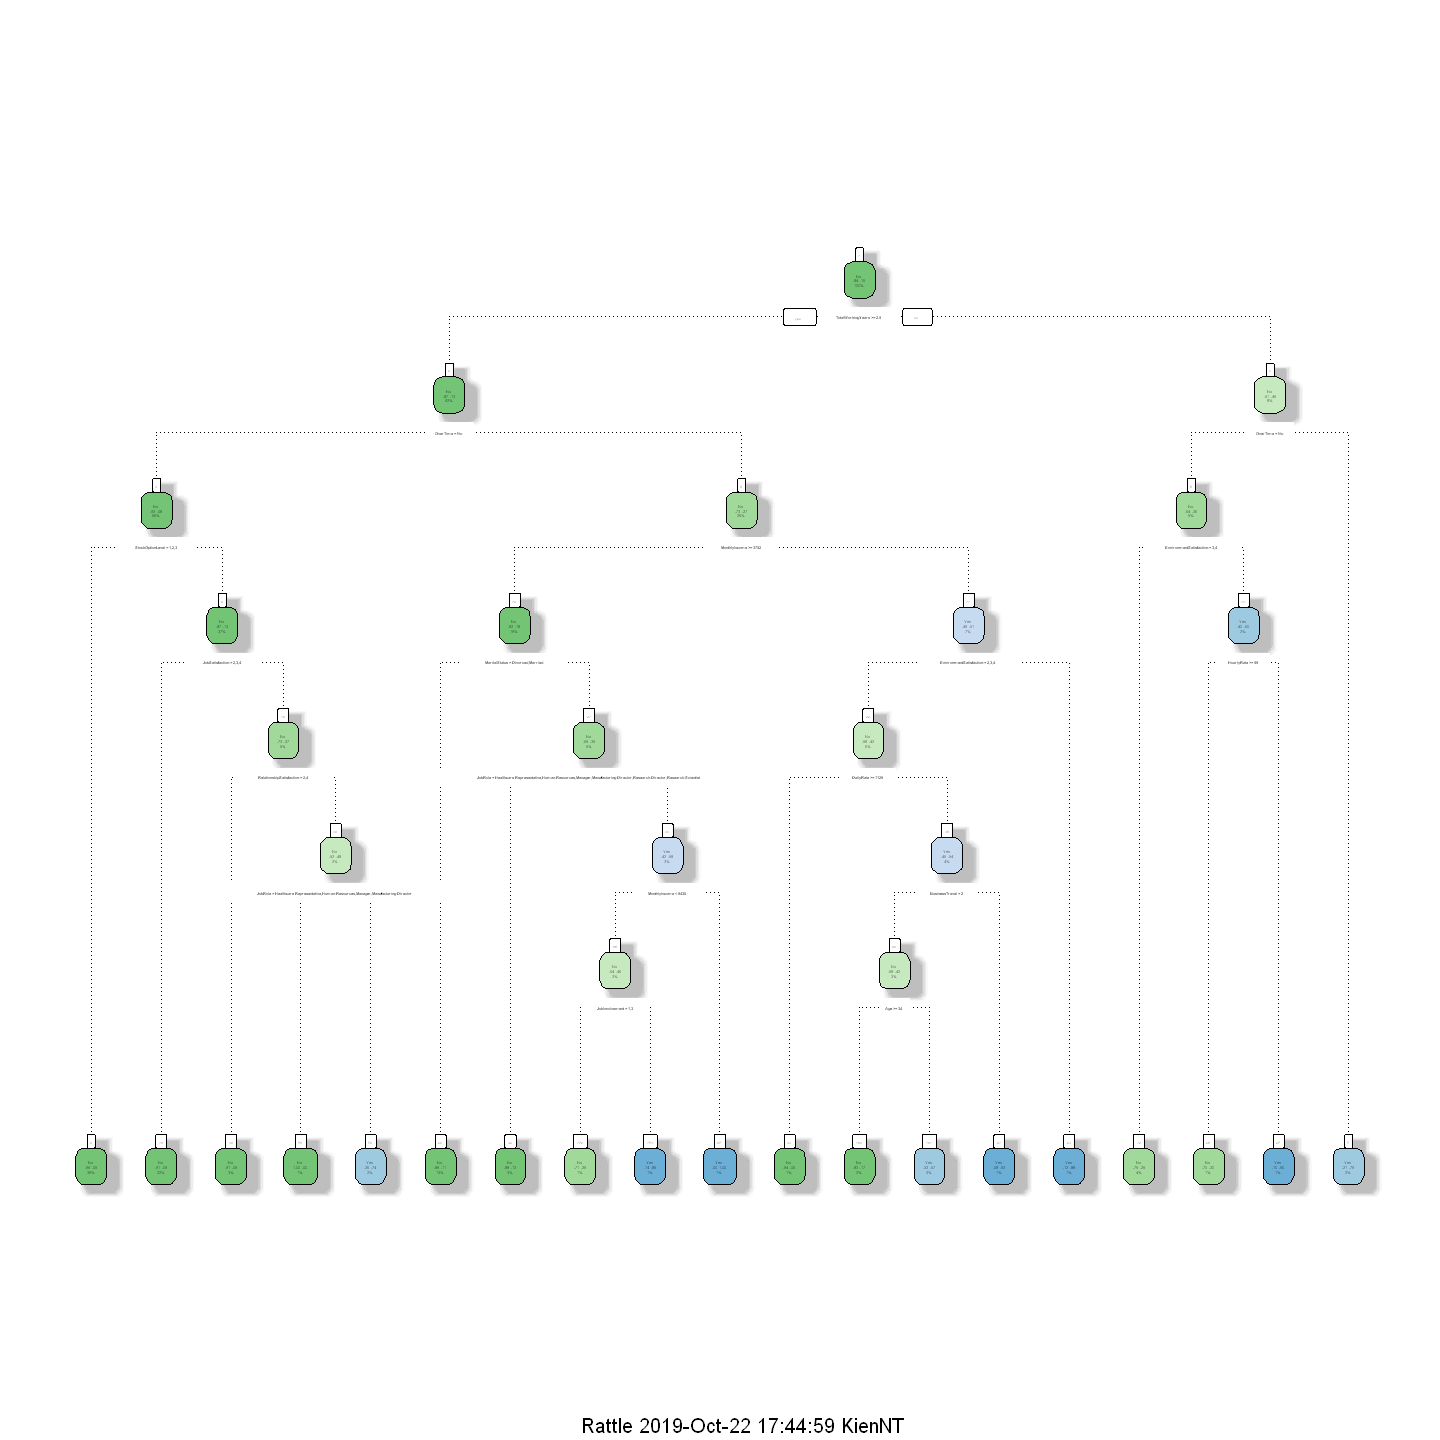

In [206]:
options(repr.plot.width=12, repr.plot.height=12) 
fancyRpartPlot(rpart.tree)

In [207]:
accuracy.meas(predictions,test$Attrition)


Call: 
accuracy.meas(response = predictions, predicted = test$Attrition)

Examples are labelled as positive when predicted is greater than 0.5 

precision: 0.109
recall: 1.000
F: 0.098

These metrics provide an interesting interpretation. With threshold value as 0.5, Precision = 1 says there are no false positives. Recall = 0.20 is very much low and indicates that we have higher number of false negatives. Threshold values can be altered also. F = 0.167 is also low and suggests weak accuracy of this model.

We’ll check the final accuracy of this model using ROC curve. This will give us a clear picture, if this model is worth. Using the function roc.curve available in this package:

In [208]:
roc.curve(test$Attrition, predictions, plotit = F)

Area under the curve (AUC): 0.638

AUC = 0.638 is a terribly low score. Therefore, it is necessary to balanced data before applying a machine learning algorithm. In this case, the algorithm gets biased toward the majority class and fails to map minority class.

We’ll use the sampling techniques and try to improve this prediction accuracy. This package provides a function named ovun.sample which enables oversampling, undersampling in one go.

Let’s start with oversampling and balance the data.

In [209]:
# over sampling
data_balanced_over <- ovun.sample(Attrition ~ ., data=train, method='over', N = 1960)$data

# under sampling
data_balanced_under<- ovun.sample(Attrition ~ ., data=train, method='under', N=376, seed=1)$data

# both sampling
data_balanced_both <- ovun.sample(Attrition ~ ., data=train, method='both', p=0.5)$data

# using ROSE package
data.rose <- train
data.rose$Educational_Levels <- as.factor(data.rose$Educational_Levels)
data.rose$CatYearManager <- as.factor(data.rose$CatYearManager)
data.rose <- ROSE(Attrition ~ ., data=data.rose, seed=1)$data

In [210]:
tree.rose <- rpart(Attrition ~., data=data.rose)
tree.over <- rpart(Attrition ~., data=data_balanced_over)
tree.under <- rpart(Attrition ~., data=data_balanced_under)
tree.both <- rpart(Attrition ~., data=data_balanced_both)

In [211]:
test.rose <- test
test.rose$Educational_Levels <- as.factor(test.rose$Educational_Levels)
test.rose$CatYearManager <- as.factor(test.rose$CatYearManager)
pred.tree.rose <- predict(tree.rose, test.rose, type='class')

pred.tree.over <- predict(tree.over, test, type='class')
pred.tree.under <- predict(tree.under, test, type='class')
pred.tree.both <- predict(tree.both, test, type='class')

In [212]:
roc.curve(test$Attrition,pred.tree.over, plotit = F)
roc.curve(test$Attrition,pred.tree.under, plotit = F)
roc.curve(test$Attrition,pred.tree.both, plotit = F)
roc.curve(test$Attrition,pred.tree.rose, plotit = F)

Area under the curve (AUC): 0.683

Area under the curve (AUC): 0.648

Area under the curve (AUC): 0.713

Area under the curve (AUC): 0.736

In [226]:
confusionMatrix(test$Attrition, predictions)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  230  16
       Yes  31  16
                                          
               Accuracy : 0.8396          
                 95% CI : (0.7925, 0.8797)
    No Information Rate : 0.8908          
    P-Value [Acc > NIR] : 0.99706         
                                          
                  Kappa : 0.3162          
                                          
 Mcnemar's Test P-Value : 0.04114         
                                          
            Sensitivity : 0.8812          
            Specificity : 0.5000          
         Pos Pred Value : 0.9350          
         Neg Pred Value : 0.3404          
             Prevalence : 0.8908          
         Detection Rate : 0.7850          
   Detection Prevalence : 0.8396          
      Balanced Accuracy : 0.6906          
                                          
       'Positive' Class : No              
                              

In [274]:
train$Educational_Levels <- as.factor(train$Educational_Levels)
train$CatYearManager <- as.factor(train$CatYearManager)
train <- train %>% filter(!is.na(Generation))
test <- test %>% filter(!is.na(Generation))
test$Educational_Levels <- as.factor(test$Educational_Levels)
test$CatYearManager <- as.factor(test$CatYearManager)

## decision tree with all value, no cross validation

In [284]:
rpart.tree <- rpart(Attrition ~ ., data=train)
test.features <- test %>% select(-Attrition)
predictions <- predict(rpart.tree, test.features, type='class')
confusionMatrix(predictions, test$Attrition)
roc.curve(predictions,test$Attrition,plotit = F)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  229  34
       Yes  15  12
                                          
               Accuracy : 0.831           
                 95% CI : (0.7828, 0.8723)
    No Information Rate : 0.8414          
    P-Value [Acc > NIR] : 0.71735         
                                          
                  Kappa : 0.2395          
                                          
 Mcnemar's Test P-Value : 0.01013         
                                          
            Sensitivity : 0.9385          
            Specificity : 0.2609          
         Pos Pred Value : 0.8707          
         Neg Pred Value : 0.4444          
             Prevalence : 0.8414          
         Detection Rate : 0.7897          
   Detection Prevalence : 0.9069          
      Balanced Accuracy : 0.5997          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.658

## decision tree with all value, cross validation

In [291]:
# let's try with grid search and cross validation 
train.cr.features <- train %>% select(-Attrition)
train.cr.labels <- train$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(train.cr.features, train.cr.labels, method='rpart',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.features <- test %>% select(-Attrition)
test.labels <- test$Attrition

cr.prediction <- predict(model, test.features)

confusionMatrix(cr.prediction, test.labels)
roc.curve(cr.prediction, test.labels, plotit = F)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  234  40
       Yes  10   6
                                          
               Accuracy : 0.8276          
                 95% CI : (0.7791, 0.8692)
    No Information Rate : 0.8414          
    P-Value [Acc > NIR] : 0.7679          
                                          
                  Kappa : 0.1216          
                                          
 Mcnemar's Test P-Value : 4.11e-05        
                                          
            Sensitivity : 0.9590          
            Specificity : 0.1304          
         Pos Pred Value : 0.8540          
         Neg Pred Value : 0.3750          
             Prevalence : 0.8414          
         Detection Rate : 0.8069          
   Detection Prevalence : 0.9448          
      Balanced Accuracy : 0.5447          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.615

## decision tree with important value, cross validation

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  234  40
       Yes  10   6
                                          
               Accuracy : 0.8276          
                 95% CI : (0.7791, 0.8692)
    No Information Rate : 0.8414          
    P-Value [Acc > NIR] : 0.7679          
                                          
                  Kappa : 0.1216          
                                          
 Mcnemar's Test P-Value : 4.11e-05        
                                          
            Sensitivity : 0.9590          
            Specificity : 0.1304          
         Pos Pred Value : 0.8540          
         Neg Pred Value : 0.3750          
             Prevalence : 0.8414          
         Detection Rate : 0.8069          
   Detection Prevalence : 0.9448          
      Balanced Accuracy : 0.5447          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.615

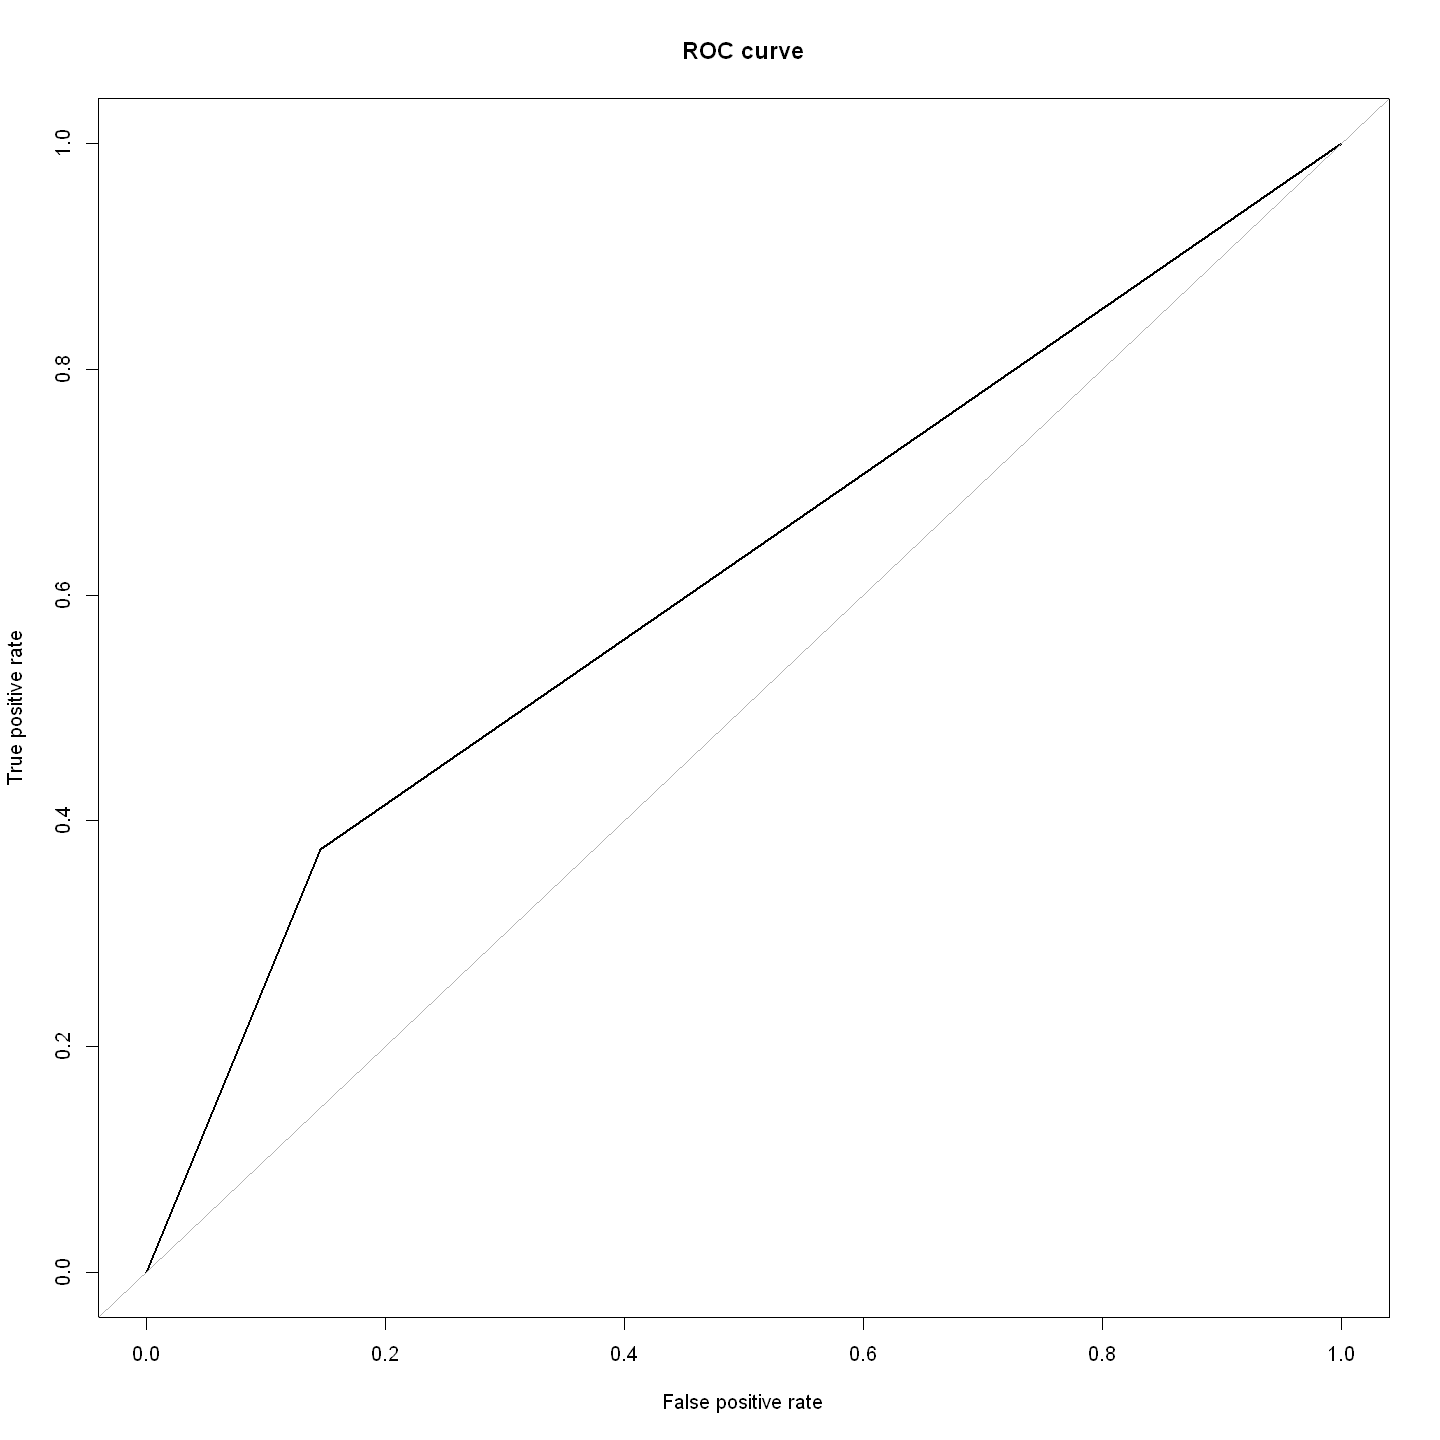

In [292]:
# only importance features with decision tree, cross validation
train_selected_features <- train %>% select(Attrition, MonthlyIncome, Age, OverTime, JobRole, TotalWorkingYears)
test_selected_features <- test %>% select(Attrition, MonthlyIncome, Age, OverTime, JobRole, TotalWorkingYears)

train.cr.features <- train_selected_features %>% select(-Attrition)
train.cr.labels <- train_selected_features$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(train.cr.features, train.cr.labels, method='rpart',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.features <- test_selected_features %>% select(-Attrition)
test.labels <- test_selected_features$Attrition

cr.prediction <- predict(model, test.features)

confusionMatrix(cr.prediction, test.labels)
roc.curve(cr.prediction, test.labels, plotit=F)

## random forest with all the features, cross validation

In [296]:
# let's try with grid search and cross validation and rf 

train.cr.features <- train %>% select(-Attrition)
train.cr.labels <- train$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(train.cr.features, train.cr.labels, method='rf',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.cr.features <- test %>% select(-Attrition)
test.cr.labels <- test$Attrition
data.cr.prediction <- predict(model, test.cr.features)

confusionMatrix(data.cr.prediction, test.cr.labels)
roc.curve(data.cr.prediction, test.cr.labels,plotit = F)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  240  37
       Yes   4   9
                                          
               Accuracy : 0.8586          
                 95% CI : (0.8131, 0.8966)
    No Information Rate : 0.8414          
    P-Value [Acc > NIR] : 0.2374          
                                          
                  Kappa : 0.2529          
                                          
 Mcnemar's Test P-Value : 5.806e-07       
                                          
            Sensitivity : 0.9836          
            Specificity : 0.1957          
         Pos Pred Value : 0.8664          
         Neg Pred Value : 0.6923          
             Prevalence : 0.8414          
         Detection Rate : 0.8276          
   Detection Prevalence : 0.9552          
      Balanced Accuracy : 0.5896          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.779

## Random Forest with important features, cross validation 

In [295]:
# let's try with grid search and cross validation with selected feature
train_selected_features <- train %>% select(Attrition, MonthlyIncome, Age, OverTime, JobRole, TotalWorkingYears)
test_selected_features <- test %>% select(Attrition, MonthlyIncome, Age, OverTime, JobRole, TotalWorkingYears)

train.cr.features <- train_selected_features %>% select(-Attrition)
train.cr.labels <- train_selected_features$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(train.cr.features, train.cr.labels, method='rf',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.cr.labels <- test_selected_features$Attrition
test.cr.features <- test_selected_features %>% select(-Attrition)

data.cr.prediction <- predict(model, test.cr.features)

confusionMatrix(data.cr.prediction, test.cr.labels)
roc.curve(data.cr.prediction, test.cr.labels, plotit = F)

note: only 4 unique complexity parameters in default grid. Truncating the grid to 4 .



Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  236  40
       Yes   8   6
                                          
               Accuracy : 0.8345          
                 95% CI : (0.7866, 0.8754)
    No Information Rate : 0.8414          
    P-Value [Acc > NIR] : 0.6617          
                                          
                  Kappa : 0.136           
                                          
 Mcnemar's Test P-Value : 7.66e-06        
                                          
            Sensitivity : 0.9672          
            Specificity : 0.1304          
         Pos Pred Value : 0.8551          
         Neg Pred Value : 0.4286          
             Prevalence : 0.8414          
         Detection Rate : 0.8138          
   Detection Prevalence : 0.9517          
      Balanced Accuracy : 0.5488          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.642

# Can be deleted

In [215]:
# let's try with grid search and cross validation 
data_cr <- train
data_cr.label <- data_cr$Attrition
data_cr$Attrition <- NULL

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(data_cr, data_cr.label, method='rpart',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.labels <- test$Attrition
test.features <- test
test.features$Attrition <- NULL
data_cr.prediction <- predict(model, test)

confusionMatrix(data_cr.prediction, test.labels)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  242  45
       Yes   4   2
                                         
               Accuracy : 0.8328         
                 95% CI : (0.785, 0.8736)
    No Information Rate : 0.8396         
    P-Value [Acc > NIR] : 0.6602         
                                         
                  Kappa : 0.0406         
                                         
 Mcnemar's Test P-Value : 1.102e-08      
                                         
            Sensitivity : 0.98374        
            Specificity : 0.04255        
         Pos Pred Value : 0.84321        
         Neg Pred Value : 0.33333        
             Prevalence : 0.83959        
         Detection Rate : 0.82594        
   Detection Prevalence : 0.97952        
      Balanced Accuracy : 0.51315        
                                         
       'Positive' Class : No             
                                         

In [262]:
# let's try with grid search and cross validation and rf 

data_cr.features <- train %>% select(-Attrition)
data_cr.labels <- train$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(data_cr.features, data_cr.labels, method='rf',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test_cr.features <- test %>% select(-Attrition)
test_cr.labels <- test$Attrition
data_cr.prediction <- predict(model, test_cr.features)

confusionMatrix(data_cr.prediction, test_cr.labels)

In [268]:
roc.curve(data_cr.prediction,test_cr.labels,plotit = F)

Area under the curve (AUC): 0.779

In [217]:
# only importance features with decision tree, no cross validation
train_selected_features <- train %>% select(Attrition, MonthlyIncome, Age, OverTime, JobRole, TotalWorkingYears)
test_selected_features <- test %>% select(Attrition, MonthlyIncome, Age, OverTime, JobRole, TotalWorkingYears)

rpart.tree.selected <- rpart(Attrition ~ ., data=train_selected_features)
prediction.selected <- predict(rpart.tree.selected, test_selected_features, type='class')

confusionMatrix(prediction.selected, test$Attrition)
roc.curve(prediction.selected, test$Attrition, plotit = F)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  230  38
       Yes  16   9
                                          
               Accuracy : 0.8157          
                 95% CI : (0.7665, 0.8584)
    No Information Rate : 0.8396          
    P-Value [Acc > NIR] : 0.882453        
                                          
                  Kappa : 0.156           
                                          
 Mcnemar's Test P-Value : 0.004267        
                                          
            Sensitivity : 0.9350          
            Specificity : 0.1915          
         Pos Pred Value : 0.8582          
         Neg Pred Value : 0.3600          
             Prevalence : 0.8396          
         Detection Rate : 0.7850          
   Detection Prevalence : 0.9147          
      Balanced Accuracy : 0.5632          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.609

In [254]:
# let's try with grid search and cross validation and decision tree with only important feature
train.cr  <- train_selected_features %>% select(-Attrition)
labels.cr <- train_selected_features$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 10)
model <- train(train.cr, labels.cr, method='rpart',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.cr.labels <- test_selected_features$Attrition
test.cr.features <- test_selected_features %>% select(-Attrition)

data.cr.prediction <- predict(model, test.cr.features)

confusionMatrix(data.cr.prediction, test.cr.labels)
roc.curve(data.cr.prediction, test.cr.labels, plotit = F)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  230  38
       Yes  16   9
                                          
               Accuracy : 0.8157          
                 95% CI : (0.7665, 0.8584)
    No Information Rate : 0.8396          
    P-Value [Acc > NIR] : 0.882453        
                                          
                  Kappa : 0.156           
                                          
 Mcnemar's Test P-Value : 0.004267        
                                          
            Sensitivity : 0.9350          
            Specificity : 0.1915          
         Pos Pred Value : 0.8582          
         Neg Pred Value : 0.3600          
             Prevalence : 0.8396          
         Detection Rate : 0.7850          
   Detection Prevalence : 0.9147          
      Balanced Accuracy : 0.5632          
                                          
       'Positive' Class : No              
                              

Area under the curve (AUC): 0.609

In [269]:
# let's try with grid search and cross validation with selected feature
train.cr  <- train_selected_features %>% select(-Attrition)
labels.cr <- train_selected_features$Attrition

trainCtr <- trainControl(method = 'repeatedcv', number = 10, repeats = 3)
model <- train(train.cr, labels.cr, method='rf',trControl = trainCtr, metric = 'Accuracy', tuneLength=15)

test.cr.labels <- test_selected_features$Attrition
test.cr.features <- test_selected_features %>% select(-Attrition)

data.cr.prediction <- predict(model, test.cr.features)

confusionMatrix(data.cr.prediction, test.cr.labels)
roc.curve(data.cr.prediction, test.cr.labels, plotit = F)

note: only 5 unique complexity parameters in default grid. Truncating the grid to 5 .



Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  239  42
       Yes   7   5
                                         
               Accuracy : 0.8328         
                 95% CI : (0.785, 0.8736)
    No Information Rate : 0.8396         
    P-Value [Acc > NIR] : 0.6602         
                                         
                  Kappa : 0.1115         
                                         
 Mcnemar's Test P-Value : 1.191e-06      
                                         
            Sensitivity : 0.9715         
            Specificity : 0.1064         
         Pos Pred Value : 0.8505         
         Neg Pred Value : 0.4167         
             Prevalence : 0.8396         
         Detection Rate : 0.8157         
   Detection Prevalence : 0.9590         
      Balanced Accuracy : 0.5390         
                                         
       'Positive' Class : No             
                                         

Area under the curve (AUC): 0.634

In [56]:
# doing H2O
library(h2o)

h2o.init()


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:data.table':

    hour, month, week, year

The following objects are masked from 'package:lubridate':

    day, hour, month, week, year

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\nguye\AppData\Local\Temp\RtmpIHGAJD/h2o_KienNT_started_from_r.out
    C:\Users\nguye\AppData\Local\Temp\RtmpIHGAJD/h2o_KienNT_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 343 milliseconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.2 
    H2O cluster version age:    2 months and 24 days  
    H2O cluster name:           H2O_started_from_R_KienNT_hsm000 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.96 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:    

In [57]:
h2o_df <- as.h2o(data)
# Splitting into training, validation and testing sets
split_df <- h2o.splitFrame(h2o_df, c(0.7, 0.15), seed=12)

# Obtaining our three types of sets into three separate values
h2o_train <- h2o.assign(split_df[[1]], "train")
h2o_validation <- h2o.assign(split_df[[2]], "validation")
h2o_test <- h2o.assign(split_df[[2]], "test")

  |======================================================================| 100%


In [58]:
h2o.describe(h2o_train)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Age,int,0,0,0,0,18,60,3.695873e+01,9.2341317,NA
Attrition,enum,0,874,0,0,0,1,1.612284e-01,0.3679181,2
BusinessTravel,enum,0,105,0,0,0,2,NA,NA,3
DailyRate,int,0,0,0,0,102,1499,7.901727e+02,405.2567110,NA
Department,enum,0,49,0,0,0,2,NA,NA,3
DistanceFromHome,int,0,0,0,0,1,29,9.029750e+00,8.0638707,NA
Education,int,0,0,0,0,1,5,2.901152e+00,1.0180025,NA
EducationField,enum,0,21,0,0,0,5,NA,NA,6
EmployeeCount,int,0,0,0,0,1,1,1.000000e+00,0.0000000,NA
EmployeeNumber,int,0,0,0,0,1,2065,1.031714e+03,608.6139027,NA


In [59]:
# Establish X and Y (Features and Labels)
y <- "Attrition"
x <- setdiff(names(h2o_train), y)

In [60]:
auto_ml <- h2o.automl(
    y = y,
    x = x,
    training_frame = h2o_train,
    leaderboard_frame = h2o_validation,
    project_name = "Attrition",
    max_models = 10,
    seed = 12
)

  |======================================================================| 100%


In [61]:
top_models <- auto_ml@leaderboard
print(top_models)

                                             model_id       auc   logloss
1                        GBM_1_AutoML_20191021_203434 0.8245701 0.3670655
2               DeepLearning_1_AutoML_20191021_203434 0.8220899 0.3710894
3                        GBM_3_AutoML_20191021_203434 0.8169643 0.3508890
4    StackedEnsemble_AllModels_AutoML_20191021_203434 0.8156415 0.3340308
5           GLM_grid_1_AutoML_20191021_203434_model_1 0.8154762 0.3626739
6 StackedEnsemble_BestOfFamily_AutoML_20191021_203434 0.8134921 0.3357871
  mean_per_class_error      rmse        mse
1            0.2361111 0.3342968 0.11175436
2            0.2142857 0.3290923 0.10830172
3            0.2063492 0.3222367 0.10383650
4            0.1607143 0.3120070 0.09734835
5            0.2242063 0.3125395 0.09768095
6            0.1964286 0.3134894 0.09827561

[12 rows x 6 columns] 


In [62]:
# Get the best model
# Our aim is to determine the feature importance
model_id <- as.data.frame(top_models$model_id)[,1]
best_family <- h2o.getModel(grep("StackedEnsemble_BestOfFamily", model_id, value=TRUE)[1])
obtain_model <- h2o.getModel(best_family@model$metalearner$name)

In [63]:
# How important is each model to the StackEnsemble
h2o.varimp(obtain_model)

variable,relative_importance,scaled_importance,percentage
GLM_grid_1_AutoML_20191021_203434_model_1,0.90731132,1.00000000,0.64643329
XRT_1_AutoML_20191021_203434,0.33627806,0.37063140,0.23958848
DeepLearning_1_AutoML_20191021_203434,0.11790216,0.12994675,0.08400191
DRF_1_AutoML_20191021_203434,0.04207373,0.04637188,0.02997632
GBM_1_AutoML_20191021_203434,0.00000000,0.00000000,0.00000000


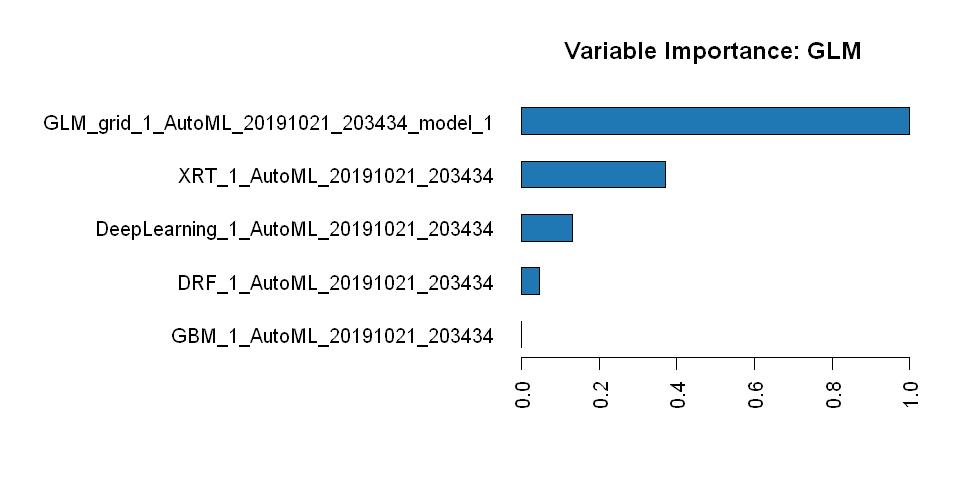

In [64]:
options(repr.plot.width=8, repr.plot.height=4) 
h2o.varimp_plot(obtain_model)

In [65]:
xgb <- h2o.getModel(grep("GLM", model_id, value = TRUE)[1])

# Examine the variable importance of the top XGBoost model
# XGBoost can show the feature importance as oppose to the stack ensemble
h2o.varimp(xgb)

variable,relative_importance,scaled_importance,percentage
OverTime.Yes,0.861491584,1.000000000,0.0599301076
OverTime.No,0.854017680,0.991324462,0.0594101817
BusinessTravel.Travel_Frequently,0.734991438,0.853161484,0.0511300595
BusinessTravel.Non-Travel,0.696923928,0.808973577,0.0484818735
MaritalStatus.Single,0.587108660,0.681502490,0.0408425176
Department.Research & Development,0.520026023,0.603634479,0.0361758793
Department.Sales,0.519888242,0.603474546,0.0361662944
YearsSinceLastPromotion,0.516976193,0.600094305,0.0359637163
NumCompaniesWorked,0.484643031,0.562562700,0.0337144431
JobRole.Laboratory Technician,0.470669640,0.546342703,0.0327423770


### this section to export data for making butterfly chart only 

In [64]:
attr.job <- data %>% group_by(JobRole, Attrition) %>% summarise(Count=n()) %>%
mutate(pct=round(prop.table(Count),2) * 100)

nofunc <- colorRampPalette(c("#A9F5A9", "#58FA58", "#01DF01"))
yesfunc <- colorRampPalette(c("#F5A9A9", "#FE2E2E", "#B40404"))

yes.attr <- attr.job %>% filter(Attrition == "Yes") %>% arrange(JobRole) 
no.attr <- attr.job %>% filter(Attrition == "No") %>% arrange(JobRole)

yes.attr <- yes.attr %>% select(JobRole, pct)
no.attr <- no.attr %>% select(JobRole, pct)

names(no.attr)[2] <- "pct_no"
new_d <- merge(yes.attr, no.attr, by = "JobRole")
write.csv(new_d,"jobrole_attrition_pct.csv")